In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import os
%matplotlib inline
import re

# Let's start with the meteo dataset

In [2]:
meteo = pd.read_csv("donnees-synop-essentielles-omm.csv", sep=";")

### We first need to clean the dataset

In [3]:
meteo["formatted_date"] = meteo["Date"].apply(lambda x: str(dt.datetime.fromisoformat(x).date()))

In [4]:
# drop the useless columns
meteo.drop(labels = ["Hauteur de la neige fraîche", "Température minimale sur 24 heures (°C)", "Température maximale sur 24 heures (°C)", "Temps présent", 'Température', 'Nebulosité totale', 'Rafales sur une période', 'Précipitations dans les 3 dernières heures', "Niveau barométrique", "Température minimale sur 24 heures", "Température maximale sur 24 heures", 'Pression au niveau mer', 'ID OMM station', 'Variation de pression en 3 heures', 'Type de tendance barométrique', 'Direction du vent moyen 10 mn', 'Point de rosée', 'Visibilité horizontale', 'Temps passé 1', 'Temps passé 2', "Nébulosité  des nuages de l' étage inférieur", "Hauteur de la base des nuages de l'étage inférieur", "Type des nuages de l'étage inférieur", "Type des nuages de l'étage moyen", "Type des nuages de l'étage supérieur", "Pression station", "Géopotentiel", "Variation de pression en 24 heures", "Température minimale sur 12 heures", "Température maximale sur 12 heures", "Température minimale du sol sur 12 heures", "Méthode de mesure Température du thermomètre mouillé", "Température du thermomètre mouillé", "Rafale sur les 10 dernières minutes", "Periode de mesure de la rafale", "Etat du sol", "Hauteur totale de la couche de neige, glace, autre au sol", "Periode de mesure de la neige fraiche", "Précipitations dans la dernière heure", "Précipitations dans les 6 dernières heures", "Précipitations dans les 12 dernières heures", "Phénomène spécial 1", "Phénomène spécial 2", "Phénomène spécial 3", "Phénomène spécial 4", "Nébulosité couche nuageuse 1", "Type nuage 1", "Hauteur de base 1", "Nébulosité couche nuageuse 2", "Type nuage 2", "Hauteur de base 2", "Nébulosité couche nuageuse 3", "Type nuage 3", "Hauteur de base 3", "Nébulosité couche nuageuse 4", "Type nuage 4", "Hauteur de base 4", "Coordonnees", "Nom", "Type de tendance barométrique.1", "Temps passé 1.1", "Temps présent.1", "Température minimale sur 12 heures (°C)", "Température maximale sur 12 heures (°C)", "Température minimale du sol sur 12 heures (en °C)", "Latitude", "Longitude", "Altitude", "EPCI (name)", "EPCI (code)"], 
           inplace = True, 
           axis = 1)

In [5]:
# delete the empty lines
meteo['Précipitations dans les 24 dernières heures'] = meteo['Précipitations dans les 24 dernières heures'].fillna(0)
meteo['Vitesse du vent moyen 10 mn'] = meteo['Vitesse du vent moyen 10 mn'].fillna(0)
meteo['Humidité'] = meteo['Humidité'].fillna(0)

In [6]:
meteo.dropna(subset = ['communes (name)', 'communes (code)', 'department (name)', 'department (code)', 'Température (°C)'], inplace=True)

In [7]:
meteo.isnull().sum()/len(meteo)

Date                                           0.0
Vitesse du vent moyen 10 mn                    0.0
Humidité                                       0.0
Précipitations dans les 24 dernières heures    0.0
Température (°C)                               0.0
communes (name)                                0.0
communes (code)                                0.0
department (name)                              0.0
department (code)                              0.0
region (name)                                  0.0
region (code)                                  0.0
mois_de_l_annee                                0.0
formatted_date                                 0.0
dtype: float64

In [8]:
# modify the datased to have the mean for the city which we have many temperatures in a day

columns = ['formatted_date',
           'communes (name)',
           'communes (code)',
           'department (name)',
           'department (code)',
           'region (name)',
           'region (code)',
           'mois_de_l_annee',
           'Vitesse du vent moyen 10 mn',
            'Humidité',
            'Précipitations dans les 24 dernières heures',
            'Température (°C)']
meteo_agg = meteo[columns].groupby([
               'region (name)',
               'region (code)',
               'mois_de_l_annee',
               'formatted_date'])[['Vitesse du vent moyen 10 mn',
               'Humidité',
               'Précipitations dans les 24 dernières heures',
               'Température (°C)']].mean().reset_index()

# Now the meteo dataset is ready to use

# Let's keep on food datasets (users and pages)

In [9]:
#os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = "./prod01-data-e9741f5b1539.json"
#marmiton = pd.read_csv("gs://prod01-sbx-data-analyst/ weather_study_sessions_aggregated_pages.csv.gz",
                        #compression="gzip")

In [10]:
food = pd.read_csv("2_weather_study_sessions_aggregated_pages.csv", sep=",")


In [11]:
food.describe()

number_users  number_sessions  ratio_new_sessions  \
count  1.620707e+06     1.620707e+06        1.620707e+06   
mean   1.127221e+02     2.324782e+02        2.845081e-01   
std    5.264883e+02     1.256635e+03        2.609559e-01   
min    1.000000e+00     1.000000e+00        0.000000e+00   
25%    2.000000e+00     3.000000e+00        8.000000e-02   
50%    9.000000e+00     1.400000e+01        2.500000e-01   
75%    4.500000e+01     7.900000e+01        3.800000e-01   
max    5.349900e+04     1.411830e+05        1.000000e+00   

       avg_session_duration  avg_session_pageviews  avg_session_hits  \
count          1.620707e+06           1.620707e+06      1.620707e+06   
mean           6.072842e+02           8.128166e+00      2.312604e+01   
std            5.424942e+02           1.278584e+01      2.827344e+01   
min            1.000000e+00           2.000000e+00      2.000000e+00   
25%            3.333300e+02           3.450000e+00      1.204000e+01   
50%            5.412600e+02           5.330000e+00      1.772000e+01   
75%            7.185600e+02           8.190000e+00      2.470000e+01   
max            2.411800e+04           4.710000e+02      5.000000e+02   

       ratio_session_bounces  ratio_sessions_from_mobile  \
count                    0.0                1.620707e+06   
mean                     NaN                6.442912e-01   
std                      NaN                2.992593e-01   
min                      NaN                0.000000e+00   
25%                      NaN                5.000000e-01   
50%                      NaN                7.000000e-01   
75%                      NaN                8.600000e-01   
max                      NaN                1.000000e+00   

       ratio_sessions_from_tablet  ratio_sessions_from_desktop  ...  \
count                1.620707e+06                 1.620707e+06  ...   
mean                 9.887690e-02                 2.570024e-01  ...   
std                  1.772070e-01                 2.760980e-01  ...   
min                  0.000000e+00                 0.000000e+00  ...   
25%                  0.000000e+00                 4.000000e-02  ...   
50%                  4.000000e-02                 1.900000e-01  ...   
75%                  1.200000e-01                 3.300000e-01  ...   
max                  1.000000e+00                 1.000000e+00  ...   

       avg_ratings_counts  median_ratings_counts  avg_cooking_time  \
count        1.620707e+06           1.620707e+06      1.620707e+06   
mean         8.472807e+01           7.331226e+01      1.266941e+03   
std          1.457232e+02           1.562903e+02      1.753950e+03   
min          0.000000e+00           0.000000e+00      0.000000e+00   
25%          1.050000e+01           7.000000e+00      3.555650e+02   
50%          3.182000e+01           2.400000e+01      1.011780e+03   
75%          8.756000e+01           6.800000e+01      1.778050e+03   
max          2.056800e+03           2.571000e+03      1.800000e+05   

       median_cooking_time  avg_preparation_time  median_preparation_time  \
count         1.620707e+06          1.620707e+06             1.620707e+06   
mean          1.143122e+03          1.347377e+03             1.177832e+03   
std           1.708752e+03          2.662835e+03             2.564630e+03   
min           0.000000e+00          0.000000e+00             0.000000e+00   
25%           3.000000e+02          7.230800e+02             6.000000e+02   
50%           9.000000e+02          1.059260e+03             9.000000e+02   
75%           1.800000e+03          1.500000e+03             1.200000e+03   
max           1.800000e+05          2.592000e+05             2.592000e+05   

       avg_nb_ingredients  median_nb_ingredients  avg_nb_steps  \
count        1.620707e+06           1.620707e+06  1.620662e+06   
mean         7.367678e+00           7.235881e+00  6.193572e+00   
std          2.993948e+00           3.278469e+00  2.442830e+00   
min          0.000000e+00           0.000000e+0

In [12]:
food.region.unique()

array(['Ile-de-France', 'Nouvelle-Aquitaine', '(not set)', 'Corsica',
       'Centre-Val de Loire', 'Normandy', 'Occitanie', 'Hauts-de-France',
       'Grand Est', 'Auvergne-Rhone-Alpes', 'Brittany',
       'Pays de la Loire', 'Bourgogne-Franche-Comte',
       "Provence-Alpes-Cote d'Azur"], dtype=object)

In [13]:
# We need to modify the structure of regions data

import unicodedata

def remove_accents(string):
    """Removes accents from text

    Args:
        string (str): string to be cleaned.

    Returns:
        str: cleaned string with no accents.
    """
    nfkd_form = unicodedata.normalize("NFKD", string)
    return u"".join([c for c in nfkd_form if not unicodedata.combining(c)])

In [14]:
meteo_agg["region_name"] = meteo_agg["region (name)"].astype("str").apply(remove_accents)

In [15]:
dico = {
    "Brittany": "Bretagne", 
    "Normandy": "Normandie",
    "Corsica": "Corse"}

def format_region(region_name):
    new_name = dico.get(region_name)
    if new_name:
        return new_name
    else:
        return region_name

In [16]:
food.dropna(subset=["region"], inplace=True)

In [17]:
food["region_name"] = food.region.apply(format_region)

In [18]:
#set(food.region_name.unique()) - set(meteo_agg["region_name"].unique())

In [19]:
food.recipe_type.value_counts()

platprincipal     239973
dessert           212750
entree            158008
Dessert           137423
Plat principal    133230
accompagnement    129944
Entrée            113946
Accompagnement     91504
confiserie         71533
sauce              70686
Confiserie         59351
Sauce              55920
amusegueule        54048
Amuse-gueule       37020
boisson            20084
Boisson            15278
conseil            10736
Conseil             9273
Name: recipe_type, dtype: int64

In [20]:
#food['recipe_type'] = food['recipe_type'].replace('-','')

In [21]:
import unicodedata
def remove_accents(string):
    """Removes accents from text

    Args:
        string (str): string to be cleaned.

    Returns:
        str: cleaned string with no accents.
    """
    nfkd_form = unicodedata.normalize("NFKD", string)
    return u"".join([c for c in nfkd_form if not unicodedata.combining(c)])

In [22]:
food['recipe_type'] = food['recipe_type'].apply(remove_accents)

In [23]:
food.recipe_type.value_counts()

platprincipal     239973
dessert           212750
entree            158008
Dessert           137423
Plat principal    133230
accompagnement    129944
Entree            113946
Accompagnement     91504
confiserie         71533
sauce              70686
Confiserie         59351
Sauce              55920
amusegueule        54048
Amuse-gueule       37020
boisson            20084
Boisson            15278
conseil            10736
Conseil             9273
Name: recipe_type, dtype: int64

In [24]:
def clean_up(s):
    """
    Cleans up numbers, URLs, and special characters from a string.

    Args:
        s: The string to be cleaned up.

    Returns:
        A string that has been cleaned up.
    """
    string = re.sub(r'http\S+', '', s)
    return re.sub('[^A-Za-z]+', '', string).lower().strip()

In [25]:
food['recipe_type'] = food['recipe_type'].apply(clean_up)

In [26]:
food.recipe_type.value_counts()

platprincipal     373203
dessert           350173
entree            271954
accompagnement    221448
confiserie        130884
sauce             126606
amusegueule        91068
boisson            35362
conseil            20009
Name: recipe_type, dtype: int64

# Let's join both food and Meteo datasets to start the analysis


In [27]:
# We'll join the two datasets (marmiton_user and meteo)
final_df = food.set_index(["date","region_name"]).join(meteo_agg.set_index(["formatted_date",
                                                                                 "region_name"]),
                                                            on=["date",
                                                                "region_name"],
                                                            how="inner").reset_index()

In [28]:
final_df.head()

date    region_name         region    recipe_type Pagelvl4  \
0  2021-10-18  Ile-de-France  Ile-de-France  platprincipal      NaN   
1  2021-10-18  Ile-de-France  Ile-de-France  platprincipal      NaN   
2  2021-10-18  Ile-de-France  Ile-de-France        conseil      NaN   
3  2021-10-18  Ile-de-France  Ile-de-France        dessert      NaN   
4  2021-10-18  Ile-de-France  Ile-de-France    amusegueule      NaN   

   number_users  number_sessions  ratio_new_sessions  avg_session_duration  \
0             1                2                0.00                880.00   
1          6550            11698                0.34                582.02   
2           264              423                0.39                452.55   
3          3062             6634                0.32                575.31   
4           635             1229                0.37                515.13   

   avg_session_pageviews  ...  median_nb_ingredients  avg_nb_steps  \
0                   8.00  ...                      8          8.00   
1                   6.56  ...                      8          6.80   
2                   3.17  ...                      0          1.14   
3                   7.91  ...                      6          6.91   
4                   7.57  ...                      6          6.93   

   median_nb_steps  region (name)  region (code)  mois_de_l_annee  \
0              8.0  Île-de-France           11.0               10   
1              6.0  Île-de-France           11.0               10   
2              1.0  Île-de-France           11.0               10   
3              6.0  Île-de-France           11.0               10   
4              7.0  Île-de-France           11.0               10   

   Vitesse du vent moyen 10 mn  Humidité  \
0                       2.3125      86.5   
1                       2.3125      86.5   
2                       2.3125      86.5   
3                       2.3125      86.5   
4                       2.3125      86.5   

   Précipitations dans les 24 dernières heures  Température (°C)  
0                                       0.2875              12.0  
1                                       0.2875              12.0  
2                                       0.2875              12.0  
3                                       0.2875              12.0  
4                                       0.2875              12.0  

[5 rows x 61 columns]

In [29]:
final_df.shape

(1594153, 61)

In [30]:
final_df.drop(labels = ['region', 'region (name)', 'region (code)', 'mois_de_l_annee', 'Vitesse du vent moyen 10 mn', 'Humidité'], 
              inplace = True,
              axis = 1)

In [31]:
# We have too many different values for the Pagelvl4, so we'll drop the value under 5% of the total

In [32]:
np.where(final_df['Pagelvl4'].value_counts() > 77000)

(array([], dtype=int64),)

In [33]:
np.max(final_df['Pagelvl4'].value_counts()) * 0.05

1498.7

In [34]:
idx_to_keep = np.where(final_df['Pagelvl4'].value_counts() > np.max(final_df['Pagelvl4'].value_counts()) * 0.05)[0]

In [35]:
type_recettes_to_keep = list(final_df['Pagelvl4'].value_counts().index[idx_to_keep])

In [36]:
final_df = final_df[final_df['Pagelvl4'].isin(type_recettes_to_keep)]

In [37]:
final_df.head()

date    region_name     recipe_type Pagelvl4  number_users  \
10  2021-10-18  Ile-de-France  accompagnement      riz           361   
11  2021-10-18  Ile-de-France         dessert     flan             1   
12  2021-10-18  Ile-de-France         dessert     flan           942   
13  2021-10-18  Ile-de-France         dessert     pain            13   
14  2021-10-18  Ile-de-France   platprincipal     pain            16   

    number_sessions  ratio_new_sessions  avg_session_duration  \
10              666                0.30                862.91   
11                1                0.00                  4.00   
12             2147                0.31                672.05   
13               19                0.42                746.05   
14               22                0.45                595.68   

    avg_session_pageviews  avg_session_hits  ...  avg_cooking_time  \
10                   8.24             23.39  ...           1293.78   
11                   2.00              2.00  ...           2700.00   
12                   6.19             18.02  ...           2274.22   
13                   4.00             15.68  ...            805.26   
14                   5.00             17.00  ...           1363.64   

    median_cooking_time  avg_preparation_time  median_preparation_time  \
10                 1200                826.04                      900   
11                 2700                900.00                      900   
12                 2400               1033.41                      900   
13                  600               5463.16                     6600   
14                  900                886.36                      900   

    avg_nb_ingredients  median_nb_ingredients  avg_nb_steps  median_nb_steps  \
10                7.27                      8          5.43              5.0   
11                6.00                      6          5.00              5.0   
12                6.53                      6          6.78              6.0   
13                7.11                      7          6.26              6.0   
14                9.09                      8          7.00              6.0   

    Précipitations dans les 24 dernières heures  Température (°C)  
10                                       0.2875              12.0  
11                                       0.2875              12.0  
12                                       0.2875              12.0  
13                                       0.2875              12.0  
14                                       0.2875              12.0  

[5 rows x 55 columns]

In [38]:
final_df['Pagelvl4'].value_counts()

aperitif-dinatoire                                   29974
entree-chaude                                        27613
pain                                                 24838
viande                                               24217
bouchee-ou-amuse-bouche                              23664
                                                     ...  
poulet-aux-abricots-facile                            1607
spaghetti-de-courgette-a-la-carbonara                 1606
paella-a-la-plancha                                   1605
sauces-au-thermomix                                   1568
nuggets-antigaspi-avec-restes-poulet-roti-et-pain     1545
Name: Pagelvl4, Length: 178, dtype: int64

In [39]:
final_df['type_recette'] = final_df['recipe_type'] + ' / ' + final_df['Pagelvl4']

In [40]:
final_df.shape

(1405310, 56)

In [41]:
final_df['type_recette'].value_counts()

dessert / gateau                     6643
platprincipal / viande               6386
platprincipal / plat-unique          6313
platprincipal / pates-riz-semoule    6173
dessert / tarte                      6163
                                     ... 
amusegueule / crepe                    29
sauce / bonbons                        27
platprincipal / flan                   26
platprincipal / viennoiseries          22
entree / puree                         14
Name: type_recette, Length: 365, dtype: int64

In [44]:
idx_to_keep = np.where(final_df['type_recette'].value_counts() > np.max(final_df['type_recette'].value_counts()) * 0.05)[0]
type_recettes_to_keep = list(final_df['type_recette'].value_counts().index[idx_to_keep])
final_df = final_df[final_df['type_recette'].isin(type_recettes_to_keep)]

In [42]:
final_df.head()

date    region_name     recipe_type Pagelvl4  number_users  \
10  2021-10-18  Ile-de-France  accompagnement      riz           361   
11  2021-10-18  Ile-de-France         dessert     flan             1   
12  2021-10-18  Ile-de-France         dessert     flan           942   
13  2021-10-18  Ile-de-France         dessert     pain            13   
14  2021-10-18  Ile-de-France   platprincipal     pain            16   

    number_sessions  ratio_new_sessions  avg_session_duration  \
10              666                0.30                862.91   
11                1                0.00                  4.00   
12             2147                0.31                672.05   
13               19                0.42                746.05   
14               22                0.45                595.68   

    avg_session_pageviews  avg_session_hits  ...  median_cooking_time  \
10                   8.24             23.39  ...                 1200   
11                   2.00              2.00  ...                 2700   
12                   6.19             18.02  ...                 2400   
13                   4.00             15.68  ...                  600   
14                   5.00             17.00  ...                  900   

    avg_preparation_time  median_preparation_time  avg_nb_ingredients  \
10                826.04                      900                7.27   
11                900.00                      900                6.00   
12               1033.41                      900                6.53   
13               5463.16                     6600                7.11   
14                886.36                      900                9.09   

    median_nb_ingredients  avg_nb_steps  median_nb_steps  \
10                      8          5.43              5.0   
11                      6          5.00              5.0   
12                      6          6.78              6.0   
13                      7          6.26              6.0   
14                      8          7.00              6.0   

    Précipitations dans les 24 dernières heures  Température (°C)  \
10                                       0.2875              12.0   
11                                       0.2875              12.0   
12                                       0.2875              12.0   
13                                       0.2875              12.0   
14                                       0.2875              12.0   

            type_recette  
10  accompagnement / riz  
11        dessert / flan  
12        dessert / flan  
13        dessert / pain  
14  platprincipal / pain  

[5 rows x 56 columns]

In [45]:
# To start the EDA, we need to add some informations about the calendar: the day in the week, or the holidays can impact the website audience

from jours_feries_france import JoursFeries
from datetime import datetime
import numpy as np

final_df["dt_date"] = final_df['date'].apply(lambda x: datetime.strptime(str(x), "%Y-%m-%d"))
final_df["month"] = final_df["dt_date"].dt.month
final_df["day"] = final_df["dt_date"].dt.day
final_df["weeknumber"] = final_df["dt_date"].apply(lambda x: x.isocalendar()[1])
final_df["dayofweek"] = final_df["dt_date"].dt.dayofweek + 1
final_df["is_weekend"] = np.where(final_df["dayofweek"].isin([6, 7]), 1, 0)
final_df["is_bank_holiday"] = final_df["dt_date"].apply(lambda x: 0 if JoursFeries.is_bank_holiday(x, zone="Métropole") == False else 1)

/opt/anaconda3/envs/env_jul/lib/python3.8/site-packages/jours_feries_france/__init__.py:41: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  return date in JoursFeries.for_year(date.year, zone).values()


In [46]:
final_df.head()

date    region_name     recipe_type Pagelvl4  number_users  \
10  2021-10-18  Ile-de-France  accompagnement      riz           361   
11  2021-10-18  Ile-de-France         dessert     flan             1   
12  2021-10-18  Ile-de-France         dessert     flan           942   
13  2021-10-18  Ile-de-France         dessert     pain            13   
14  2021-10-18  Ile-de-France   platprincipal     pain            16   

    number_sessions  ratio_new_sessions  avg_session_duration  \
10              666                0.30                862.91   
11                1                0.00                  4.00   
12             2147                0.31                672.05   
13               19                0.42                746.05   
14               22                0.45                595.68   

    avg_session_pageviews  avg_session_hits  ...  \
10                   8.24             23.39  ...   
11                   2.00              2.00  ...   
12                   6.19             18.02  ...   
13                   4.00             15.68  ...   
14                   5.00             17.00  ...   

    Précipitations dans les 24 dernières heures  Température (°C)  \
10                                       0.2875              12.0   
11                                       0.2875              12.0   
12                                       0.2875              12.0   
13                                       0.2875              12.0   
14                                       0.2875              12.0   

            type_recette    dt_date  month  day  weeknumber  dayofweek  \
10  accompagnement / riz 2021-10-18     10   18          42          1   
11        dessert / flan 2021-10-18     10   18          42          1   
12        dessert / flan 2021-10-18     10   18          42          1   
13        dessert / pain 2021-10-18     10   18          42          1   
14  platprincipal / pain 2021-10-18     10   18          42          1   

    is_weekend  is_bank_holiday  
10           0                0  
11           0                0  
12           0                0  
13           0                0  
14           0                0  

[5 rows x 63 columns]

# EDA

In [ ]:
# Pandas profiling

In [ ]:
import pandas_profiling
from pandas_profiling import ProfileReport

In [ ]:
profile = pandas_profiling.ProfileReport(final_df, minimal=True)
profile

In [ ]:
df_sample = final_df.sample(10000)

In [ ]:
df_sample.shape

### 1. Evolution of pageviews analysis


<AxesSubplot:xlabel='date', ylabel='number_contents'>

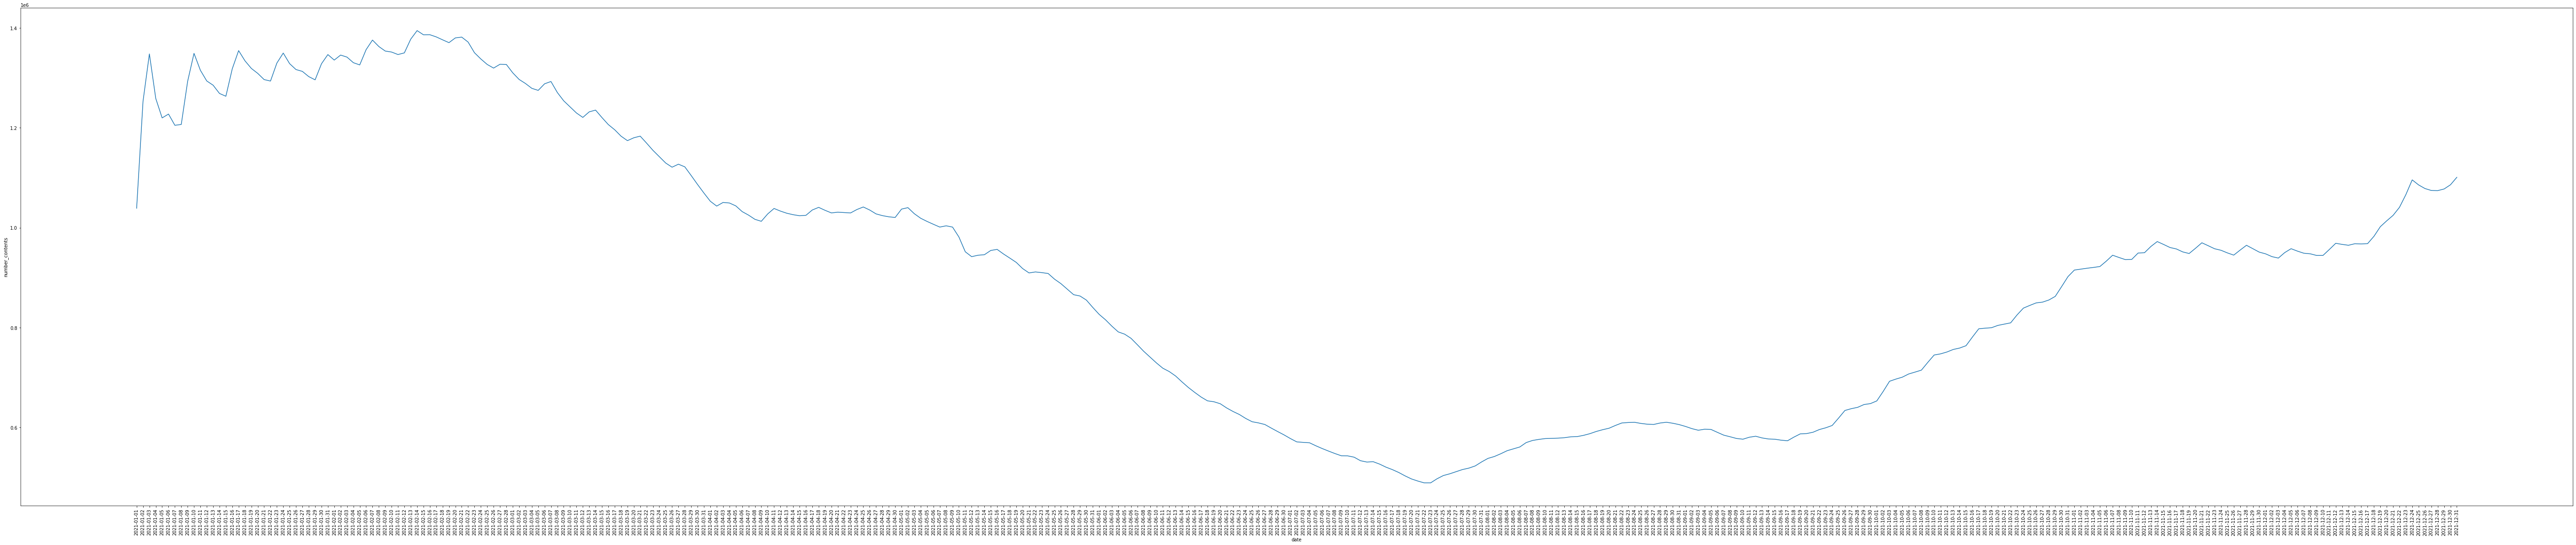

In [591]:
plt.figure(figsize=(100, 20))


total_pageviews = final_df.groupby('date')[['number_contents']].sum().ewm(span=60).mean()
plt.xticks(rotation=90)

sns.lineplot(data=total_pageviews.reset_index(),
            y='number_contents',
            x='date')




### 2. Evolution of users analysis

<AxesSubplot:xlabel='date', ylabel='number_users'>

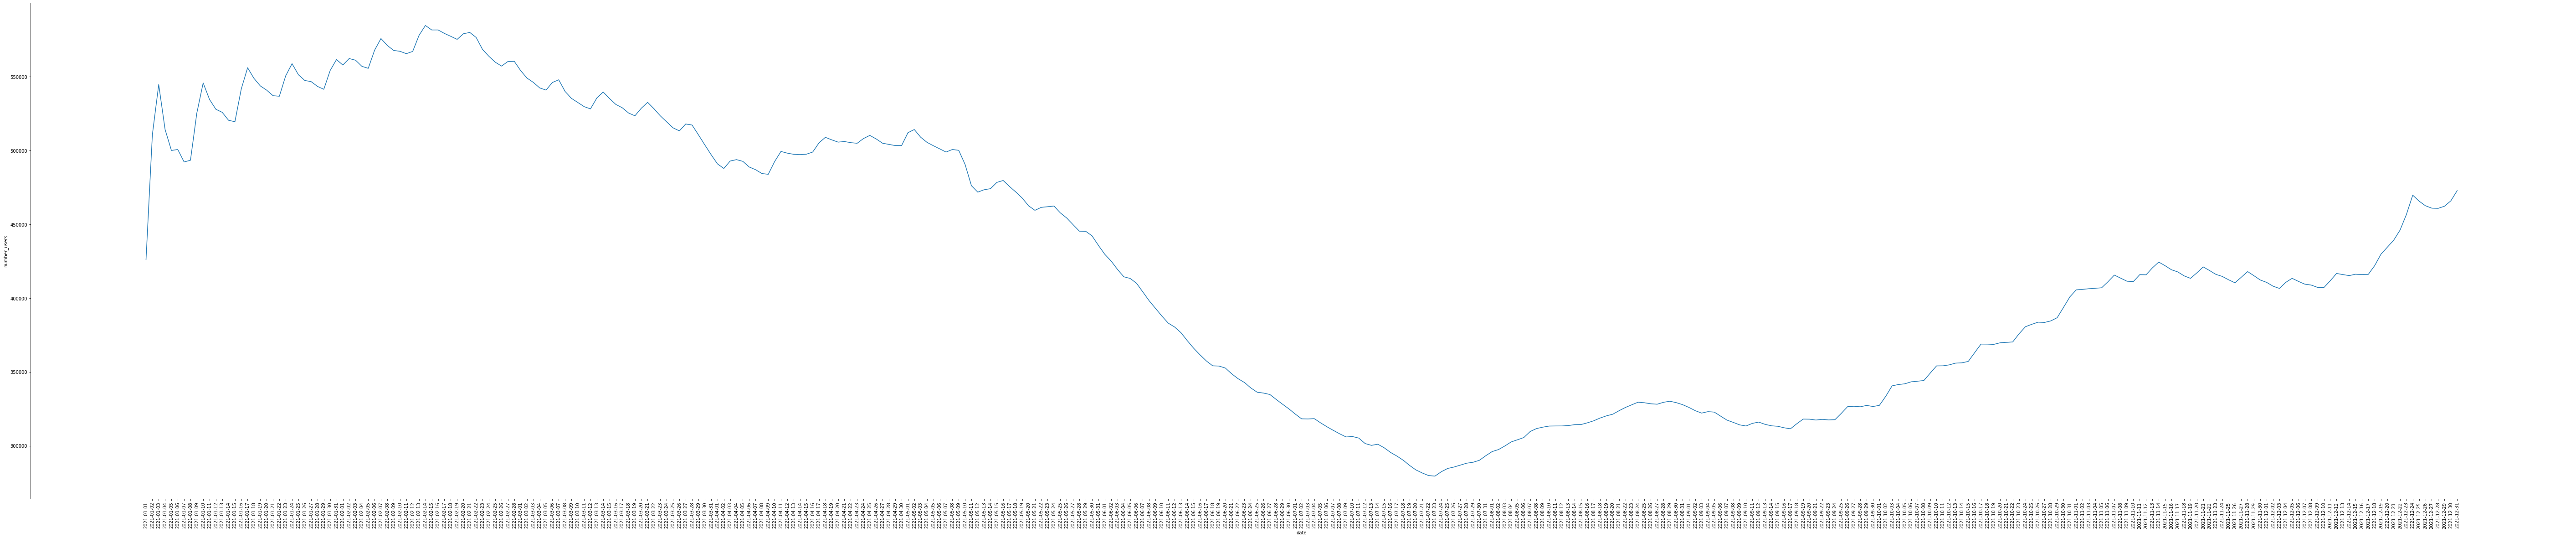

In [592]:
plt.figure(figsize=(100, 20))


total_pageviews = final_df.groupby('date')[['number_users']].sum().ewm(span=60).mean()
plt.xticks(rotation=90)

sns.lineplot(data=total_pageviews.reset_index(),
            y='number_users',
            x='date')

In [ ]:
df_sample.columns

### 3. Evolution of recipe difficulties during the year

In [ ]:
total_difficulty = final_df.groupby('date')[['ratio_recipes_difficulty_tres_facile'] ].sum().ewm(span=60).mean()


plt.figure(figsize=(25, 10))
sns.lineplot(data=total_difficulty.reset_index(),
            y='ratio_recipes_difficulty_tres_facile',
            x='date')
plt.grid()
plt.show()

In [ ]:
total_difficulty = final_df.groupby('date')[['ratio_recipes_difficulty_facile'] ].sum().ewm(span=60).mean()


plt.figure(figsize=(25, 10))
sns.lineplot(data=total_difficulty.reset_index(),
            y='ratio_recipes_difficulty_facile',
            x='date')
plt.grid()
plt.show()

In [ ]:
total_difficulty = final_df.groupby('date')[['ratio_recipes_difficulty_moyenne'] ].sum().ewm(span=60).mean()


plt.figure(figsize=(25, 10))
sns.lineplot(data=total_difficulty.reset_index(),
            y='ratio_recipes_difficulty_moyenne',
            x='date')
plt.grid()
plt.show()

In [ ]:
total_difficulty = final_df.groupby('date')[['ratio_recipes_difficulty_difficile'] ].sum().ewm(span=60).mean()


plt.figure(figsize=(25, 10))
sns.lineplot(data=total_difficulty.reset_index(),
            y='ratio_recipes_difficulty_difficile',
            x='date')
plt.grid()
plt.show()

Text(0.5, 1.0, 'Difficulty repartition - global')

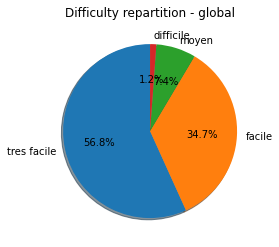

In [595]:
# Difficulty repartition, for all regions
labels = 'tres facile', 'facile', 'moyen', 'difficile'
sizes = [final_df['ratio_recipes_difficulty_tres_facile'].mean(), final_df['ratio_recipes_difficulty_facile'].mean(), final_df['ratio_recipes_difficulty_moyenne'].mean(), final_df['ratio_recipes_difficulty_difficile'].mean()]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title('Difficulty repartition - global')

In [ ]:
# Difficulty repartition global IDF
labels = 'tres facile', 'facile', 'moyen', 'difficile'
sizes = [df_sample.loc[df_sample['region_name']=='Ile-de-France']['ratio_recipes_difficulty_tres_facile'].mean(), 
         df_sample.loc[df_sample['region_name']=='Ile-de-France']['ratio_recipes_difficulty_facile'].mean(), 
         df_sample.loc[df_sample['region_name']=='Ile-de-France']['ratio_recipes_difficulty_moyenne'].mean(), 
df_sample.loc[df_sample['region_name']=='Ile-de-France']['ratio_recipes_difficulty_difficile'].mean()]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title("IDF")

# Difficulty repartition global Auvergne-Rhone-Alpes
labels = 'tres facile', 'facile', 'moyen', 'difficile'
sizes = [df_sample.loc[df_sample['region_name']=='Auvergne-Rhone-Alpes']['ratio_recipes_difficulty_tres_facile'].mean(), 
         df_sample.loc[df_sample['region_name']=='Auvergne-Rhone-Alpes']['ratio_recipes_difficulty_facile'].mean(), 
         df_sample.loc[df_sample['region_name']=='Auvergne-Rhone-Alpes']['ratio_recipes_difficulty_moyenne'].mean(), 
         df_sample.loc[df_sample['region_name']=='Auvergne-Rhone-Alpes']['ratio_recipes_difficulty_difficile'].mean()]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title("Auvergne-Rhone-Alpes")

# Difficulty repartition global Bretagne
labels = 'tres facile', 'facile', 'moyen', 'difficile'
sizes = [df_sample.loc[df_sample['region_name']=='Bretagne']['ratio_recipes_difficulty_tres_facile'].mean(), 
         df_sample.loc[df_sample['region_name']=='Bretagne']['ratio_recipes_difficulty_facile'].mean(),
         df_sample.loc[df_sample['region_name']=='Bretagne']['ratio_recipes_difficulty_moyenne'].mean(),
         df_sample.loc[df_sample['region_name']=='Bretagne']['ratio_recipes_difficulty_difficile'].mean()]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title("Bretagne")

# Difficulty repartition global Nouvelle-Aquitaine
labels = 'tres facile', 'facile', 'moyen', 'difficile'
sizes = [df_sample.loc[df_sample['region_name']=='Nouvelle-Aquitaine']['ratio_recipes_difficulty_tres_facile'].mean(), 
         df_sample.loc[df_sample['region_name']=='Nouvelle-Aquitaine']['ratio_recipes_difficulty_facile'].mean(), 
         df_sample.loc[df_sample['region_name']=='Nouvelle-Aquitaine']['ratio_recipes_difficulty_moyenne'].mean(),
         df_sample.loc[df_sample['region_name']=='Nouvelle-Aquitaine']['ratio_recipes_difficulty_difficile'].mean()]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title("Nouvelle-Aquitaine")

# Difficulty repartition global Occitanie
labels = 'tres facile', 'facile', 'moyen', 'difficile'
sizes = [df_sample.loc[df_sample['region_name']=='Occitanie']['ratio_recipes_difficulty_tres_facile'].mean(), 
         df_sample.loc[df_sample['region_name']=='Occitanie']['ratio_recipes_difficulty_facile'].mean(), 
         df_sample.loc[df_sample['region_name']=='Occitanie']['ratio_recipes_difficulty_moyenne'].mean(),
         df_sample.loc[df_sample['region_name']=='Occitanie']['ratio_recipes_difficulty_difficile'].mean()]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title("Occitanie")

# Difficulty repartition global Provence-Alpes-Cote d'Azur
labels = 'tres facile', 'facile', 'moyen', 'difficile'
sizes = [df_sample.loc[df_sample['region_name']=="Provence-Alpes-Cote d'Azur"]['ratio_recipes_difficulty_tres_facile'].mean(), 
         df_sample.loc[df_sample['region_name']=="Provence-Alpes-Cote d'Azur"]['ratio_recipes_difficulty_facile'].mean(), 
         df_sample.loc[df_sample['region_name']=="Provence-Alpes-Cote d'Azur"]['ratio_recipes_difficulty_moyenne'].mean(),
         df_sample.loc[df_sample['region_name']=="Provence-Alpes-Cote d'Azur"]['ratio_recipes_difficulty_difficile'].mean()]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title("Provence-Alpes-Cote d'Azur")


# Difficulty repartition global Hauts-de-France
labels = 'tres facile', 'facile', 'moyen', 'difficile'
sizes = [df_sample.loc[df_sample['region_name']=="Hauts-de-France"]['ratio_recipes_difficulty_tres_facile'].mean(), 
         df_sample.loc[df_sample['region_name']=="Hauts-de-France"]['ratio_recipes_difficulty_facile'].mean(), 
         df_sample.loc[df_sample['region_name']=="Hauts-de-France"]['ratio_recipes_difficulty_moyenne'].mean(),
         df_sample.loc[df_sample['region_name']=="Hauts-de-France"]['ratio_recipes_difficulty_difficile'].mean()]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title("Hauts-de-France")

# Difficulty repartition global Grand Est
labels = 'tres facile', 'facile', 'moyen', 'difficile'
sizes = [df_sample.loc[df_sample['region_name']=="Grand Est"]['ratio_recipes_difficulty_tres_facile'].mean(), 
         df_sample.loc[df_sample['region_name']=="Grand Est"]['ratio_recipes_difficulty_facile'].mean(), 
         df_sample.loc[df_sample['region_name']=="Grand Est"]['ratio_recipes_difficulty_moyenne'].mean(),
         df_sample.loc[df_sample['region_name']=="Grand Est"]['ratio_recipes_difficulty_difficile'].mean()]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title("Grand Est")

# Difficulty repartition global Pays de la Loire
labels = 'tres facile', 'facile', 'moyen', 'difficile'
sizes = [df_sample.loc[df_sample['region_name']=="Pays de la Loire"]['ratio_recipes_difficulty_tres_facile'].mean(), 
         df_sample.loc[df_sample['region_name']=="Pays de la Loire"]['ratio_recipes_difficulty_facile'].mean(), 
         df_sample.loc[df_sample['region_name']=="Pays de la Loire"]['ratio_recipes_difficulty_moyenne'].mean(),
         df_sample.loc[df_sample['region_name']=="Pays de la Loire"]['ratio_recipes_difficulty_difficile'].mean()]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title("Pays de la Loire")

# Difficulty repartition global Normandie
labels = 'tres facile', 'facile', 'moyen', 'difficile'
sizes = [df_sample.loc[df_sample['region_name']=="Normandie"]['ratio_recipes_difficulty_tres_facile'].mean(), 
         df_sample.loc[df_sample['region_name']=="Normandie"]['ratio_recipes_difficulty_facile'].mean(), 
         df_sample.loc[df_sample['region_name']=="Normandie"]['ratio_recipes_difficulty_moyenne'].mean(),
         df_sample.loc[df_sample['region_name']=="Normandie"]['ratio_recipes_difficulty_difficile'].mean()]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title("Normandie")

# Difficulty repartition global Bourgogne-Franche-Comte
labels = 'tres facile', 'facile', 'moyen', 'difficile'
sizes = [df_sample.loc[df_sample['region_name']=="Bourgogne-Franche-Comte"]['ratio_recipes_difficulty_tres_facile'].mean(), 
         df_sample.loc[df_sample['region_name']=="Bourgogne-Franche-Comte"]['ratio_recipes_difficulty_facile'].mean(), 
         df_sample.loc[df_sample['region_name']=="Bourgogne-Franche-Comte"]['ratio_recipes_difficulty_moyenne'].mean(),
         df_sample.loc[df_sample['region_name']=="Bourgogne-Franche-Comte"]['ratio_recipes_difficulty_difficile'].mean()]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title("Bourgogne-Franche-Comte")

# Difficulty repartition global Centre-Val de Loire
labels = 'tres facile', 'facile', 'moyen', 'difficile'
sizes = [df_sample.loc[df_sample['region_name']=="Centre-Val de Loire"]['ratio_recipes_difficulty_tres_facile'].mean(), 
         df_sample.loc[df_sample['region_name']=="Centre-Val de Loire"]['ratio_recipes_difficulty_facile'].mean(), 
         df_sample.loc[df_sample['region_name']=="Centre-Val de Loire"]['ratio_recipes_difficulty_moyenne'].mean(),
         df_sample.loc[df_sample['region_name']=="Centre-Val de Loire"]['ratio_recipes_difficulty_difficile'].mean()]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title("Centre-Val de Loire")

# Difficulty repartition global Corse
labels = 'tres facile', 'facile', 'moyen', 'difficile'
sizes = [df_sample.loc[df_sample['region_name']=="Corse"]['ratio_recipes_difficulty_tres_facile'].mean(), 
         df_sample.loc[df_sample['region_name']=="Corse"]['ratio_recipes_difficulty_facile'].mean(), 
         df_sample.loc[df_sample['region_name']=="Corse"]['ratio_recipes_difficulty_moyenne'].mean(),
         df_sample.loc[df_sample['region_name']=="Corse"]['ratio_recipes_difficulty_difficile'].mean()]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title("Corse")


In [ ]:
fig, ax= plt.subplots(figsize=(10, 20))
final_df.groupby('recipe_type')[['ratio_recipes_difficulty_facile',
                                  'ratio_recipes_difficulty_tres_facile',
                                'ratio_recipes_difficulty_moyenne',
                                'ratio_recipes_difficulty_difficile']].mean().sort_values(by='ratio_recipes_difficulty_facile').plot.barh(ax=ax)

### 4. Evolution of pageviews analysis by region

<AxesSubplot:xlabel='region_name', ylabel='number_users'>

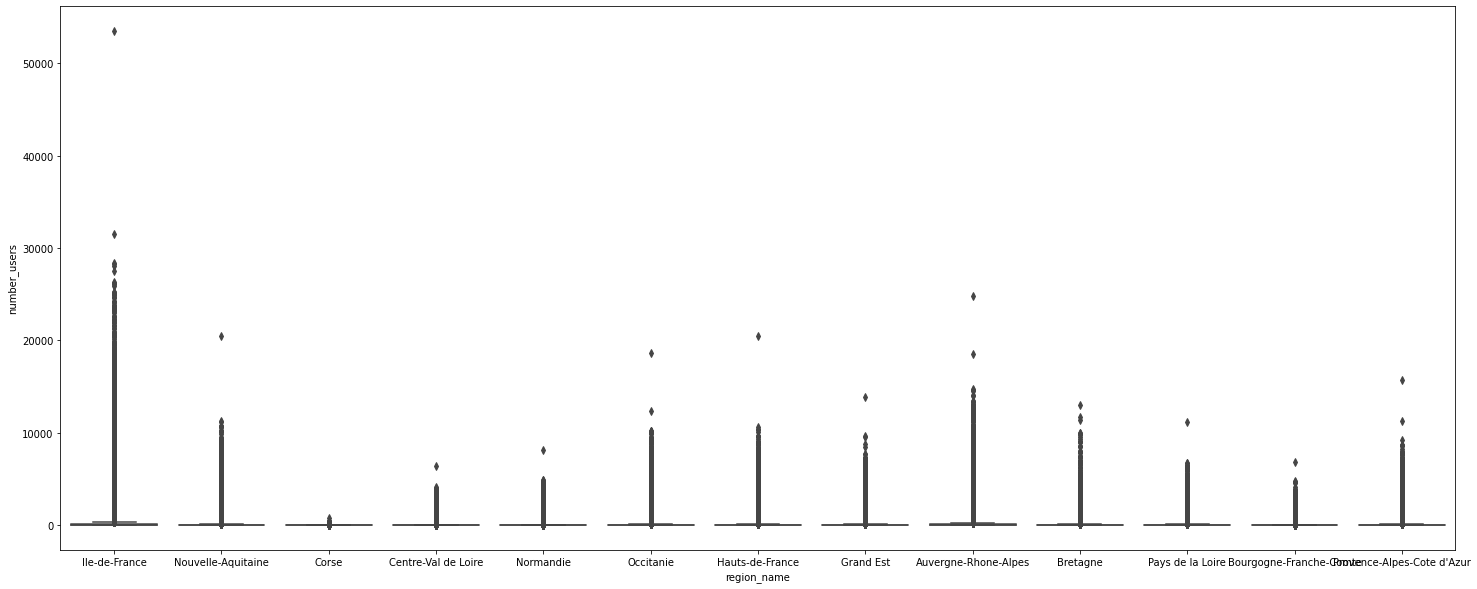

In [596]:
# Recipes pageviews repartition by region

plt.figure(figsize=(25, 10))
sns.boxplot(data = final_df, 
            x='region_name', 
            y='number_users')


In [ ]:
df_sample.region_name.value_counts()

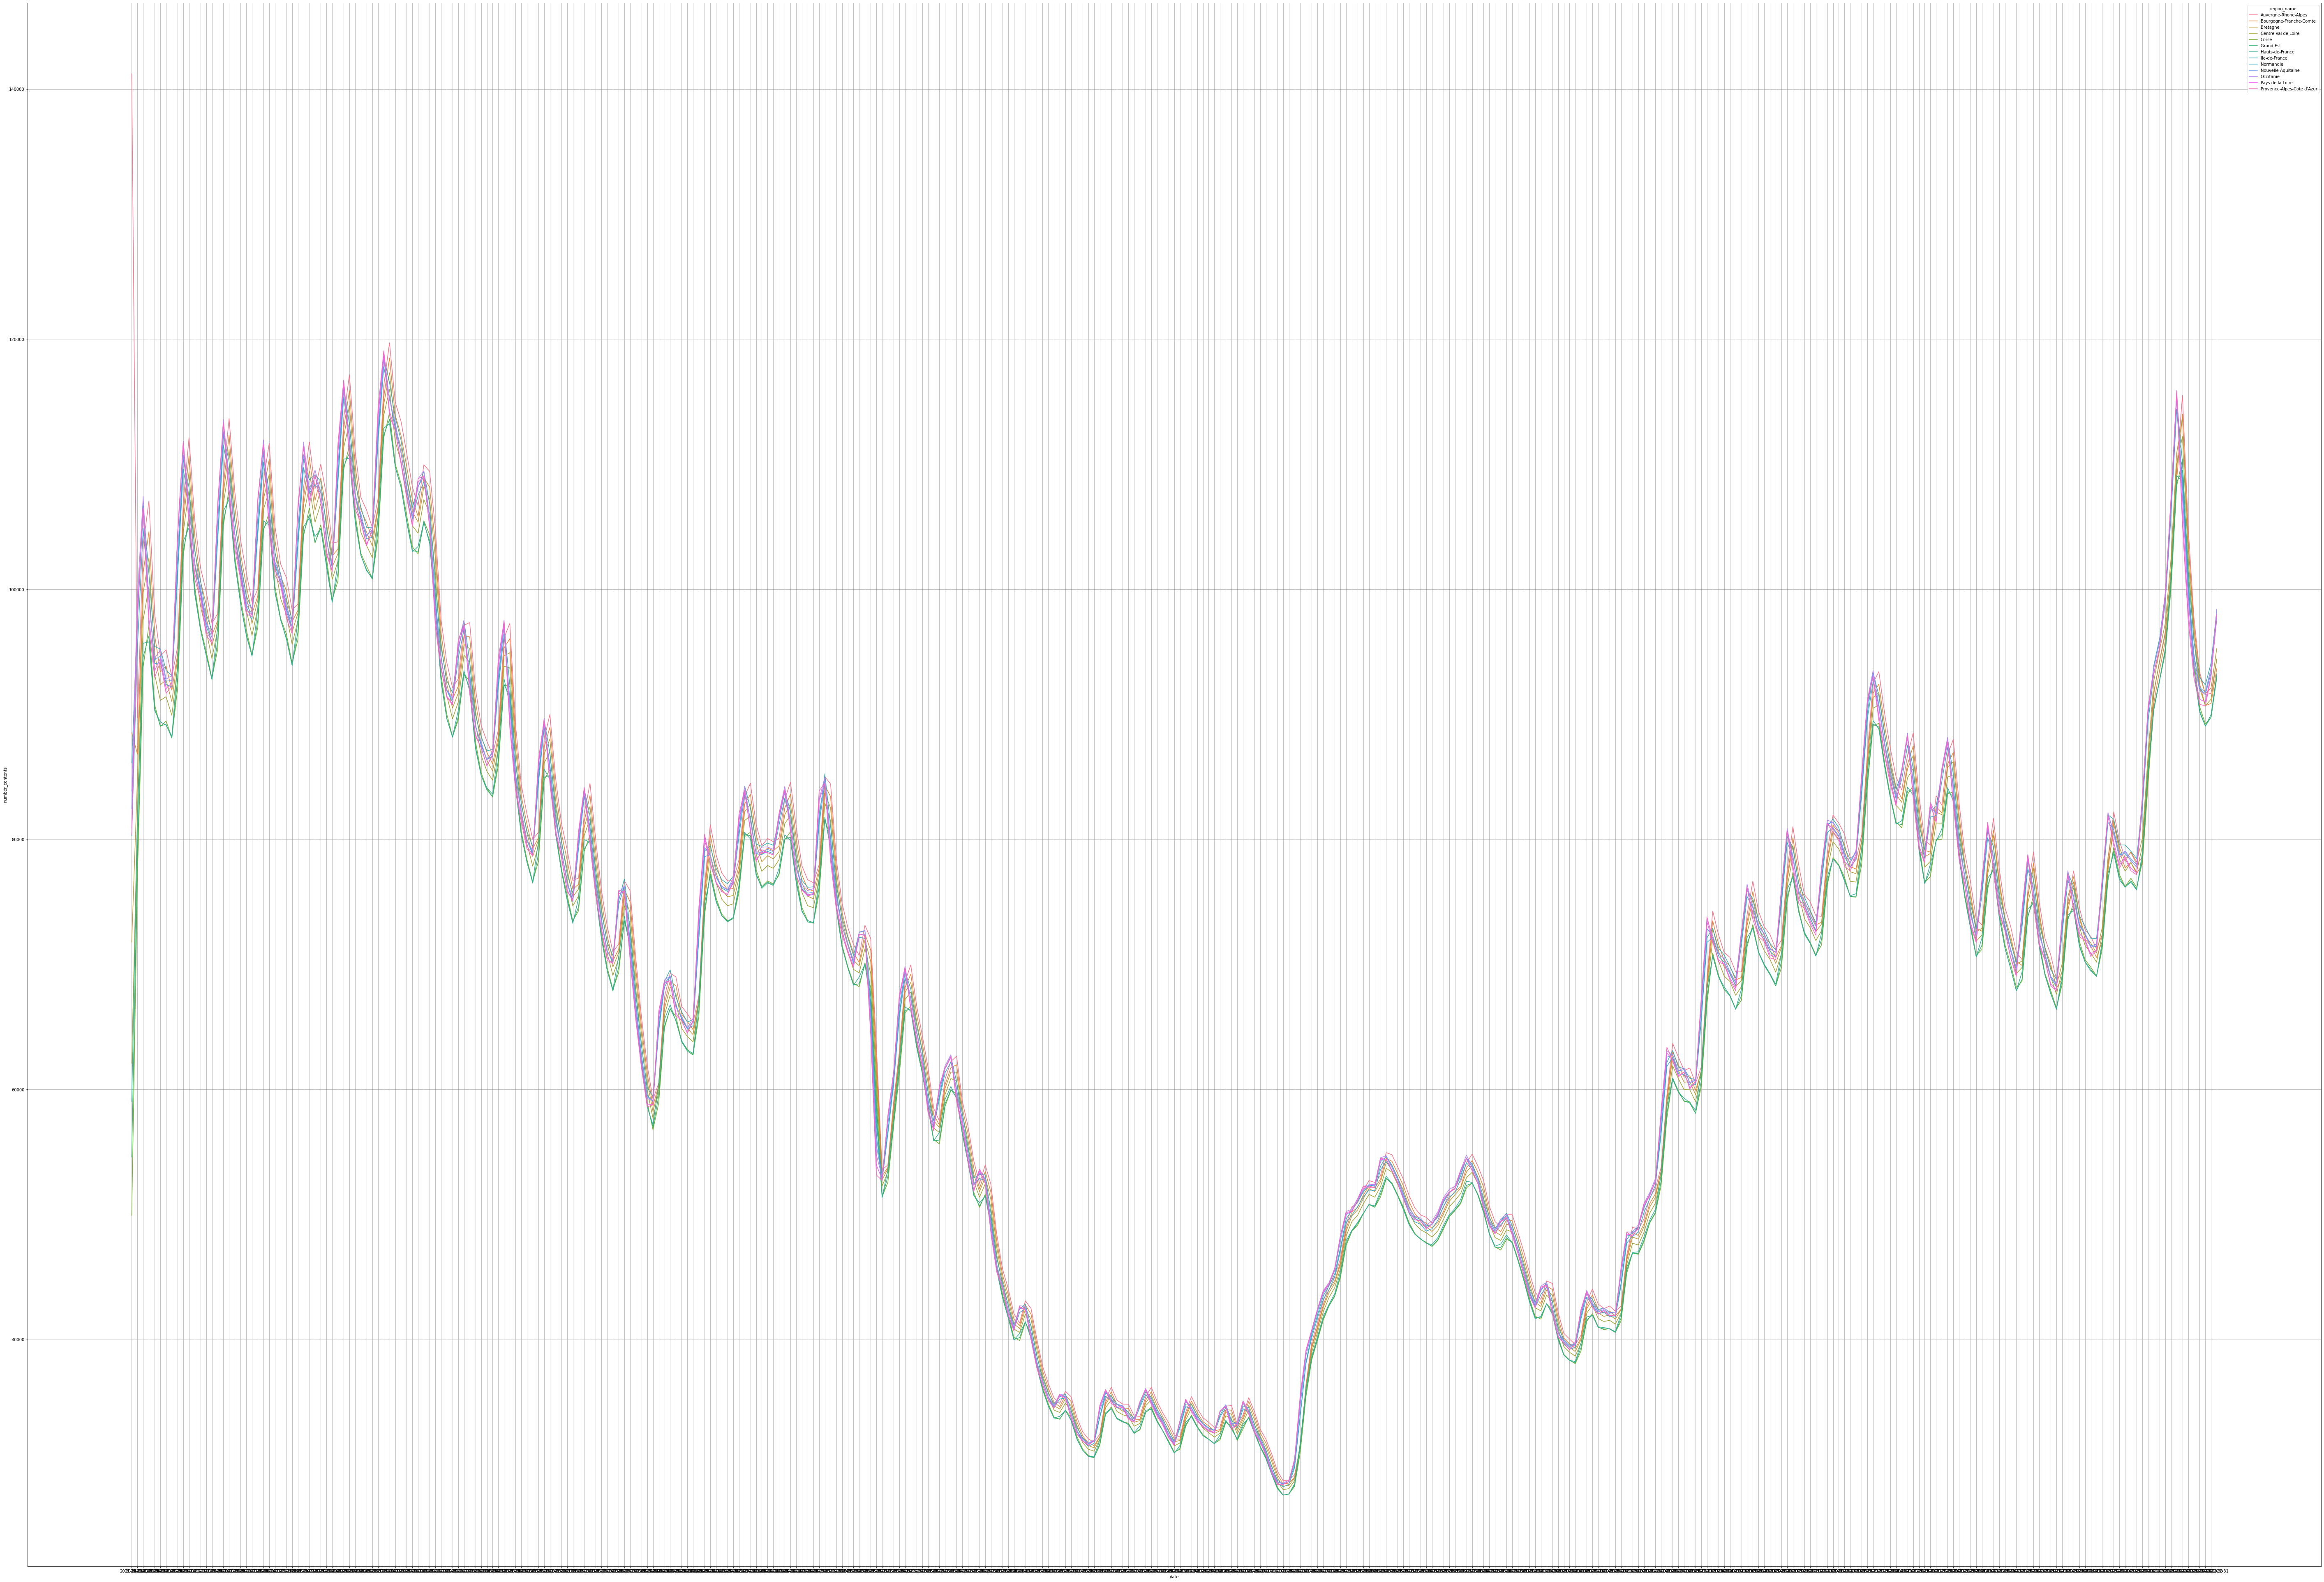

In [597]:
# All regions

total_recipes_region = final_df.groupby(['date', "region_name"])[["number_contents"]].sum().ewm(span=120).mean()
#test = (df_sample[['date',"number_contents"]]
                   # .set_index('date')
                    #.ewm(span=90)
                    #.mean())

plt.figure(figsize=(100, 70))
sns.lineplot(data=total_recipes_region.reset_index(),
             y='number_contents',
             x='date',
             hue='region_name')

plt.grid()
plt.show()

In [ ]:
total_recipes_region = final_df.groupby(['date', "region_name"])[["number_contents"]].sum().ewm(span=90).mean().reset_index()

# IDF
plt.figure(figsize=(20, 10))
sns.lineplot(data=total_recipes_region.loc[total_recipes_region['region_name']=='Ile-de-France'],
            y='number_contents',
            x='date')
plt.grid()
plt.show()

In [ ]:
# Auvergne

plt.figure(figsize=(20, 10))
sns.lineplot(data=total_recipes_region.loc[total_recipes_region['region_name']=='Auvergne-Rhone-Alpes'],
            y='number_contents',
            x='date')
plt.grid()
plt.show()


In [ ]:
# Bretagne
plt.figure(figsize=(20, 10))
sns.lineplot(data=total_recipes_region.loc[total_recipes_region['region_name']=='Bretagne'],
            y='number_contents',
            x='date')
plt.grid()
plt.show()

In [ ]:
# Nouvelle-Aquitaine
plt.figure(figsize=(20, 10))
sns.lineplot(data=total_recipes_region.loc[total_recipes_region['region_name']=='Nouvelle-Aquitaine'],
            y='number_contents',
            x='date')
plt.grid()
plt.show()

In [ ]:
# Occitanie
plt.figure(figsize=(20, 10))
sns.lineplot(data=total_recipes_region.loc[total_recipes_region['region_name']=='Occitanie'],
            y='number_contents',
            x='date')
plt.grid()
plt.show()

In [ ]:
# Provence-Alpes-Cote d'Azur

plt.figure(figsize=(20, 10))
sns.lineplot(data=total_recipes_region.loc[total_recipes_region['region_name']=="Provence-Alpes-Cote d'Azur"],
            y='number_contents',
            x='date')
plt.grid()
plt.show()

In [ ]:
# Hauts-de-France

plt.figure(figsize=(20, 10))
sns.lineplot(data=total_recipes_region.loc[total_recipes_region['region_name']=="Hauts-de-France"],
            y='number_contents',
            x='date')
plt.grid()
plt.show()


In [ ]:
# Grand Est
plt.figure(figsize=(20, 10))
sns.lineplot(data=total_recipes_region.loc[total_recipes_region['region_name']=="Grand Est"],
            y='number_contents',
            x='date')
plt.grid()
plt.show()

In [ ]:
# Pays de la Loire 

plt.figure(figsize=(20, 10))
sns.lineplot(data=total_recipes_region.loc[total_recipes_region['region_name']=="Pays de la Loire"],
            y='number_contents',
            x='date')
plt.grid()
plt.show()

In [ ]:
# Normandie
plt.figure(figsize=(20, 10))
sns.lineplot(data=total_recipes_region.loc[total_recipes_region['region_name']=="Normandie"],
            y='number_contents',
            x='date')
plt.grid()
plt.show()

In [ ]:
# Bourgogne-Franche-Comte

plt.figure(figsize=(20, 10))
sns.lineplot(data=total_recipes_region.loc[total_recipes_region['region_name']=="Bourgogne-Franche-Comte"],
            y='number_contents',
            x='date')
plt.grid()
plt.show()

In [ ]:
# Centre-Val de Loire

plt.figure(figsize=(20, 10))
sns.lineplot(data=total_recipes_region.loc[total_recipes_region['region_name']=="Centre-Val de Loire"],
            y='number_contents',
            x='date')
plt.grid()
plt.show()

In [ ]:
# Corse

plt.figure(figsize=(20, 10))
sns.lineplot(data=total_recipes_region.loc[total_recipes_region['region_name']=="Corse"],
            y='number_contents',
            x='date')
plt.grid()
plt.show()

### 4. Recipes by recipe_type

<AxesSubplot:xlabel='recipe_type', ylabel='number_contents'>

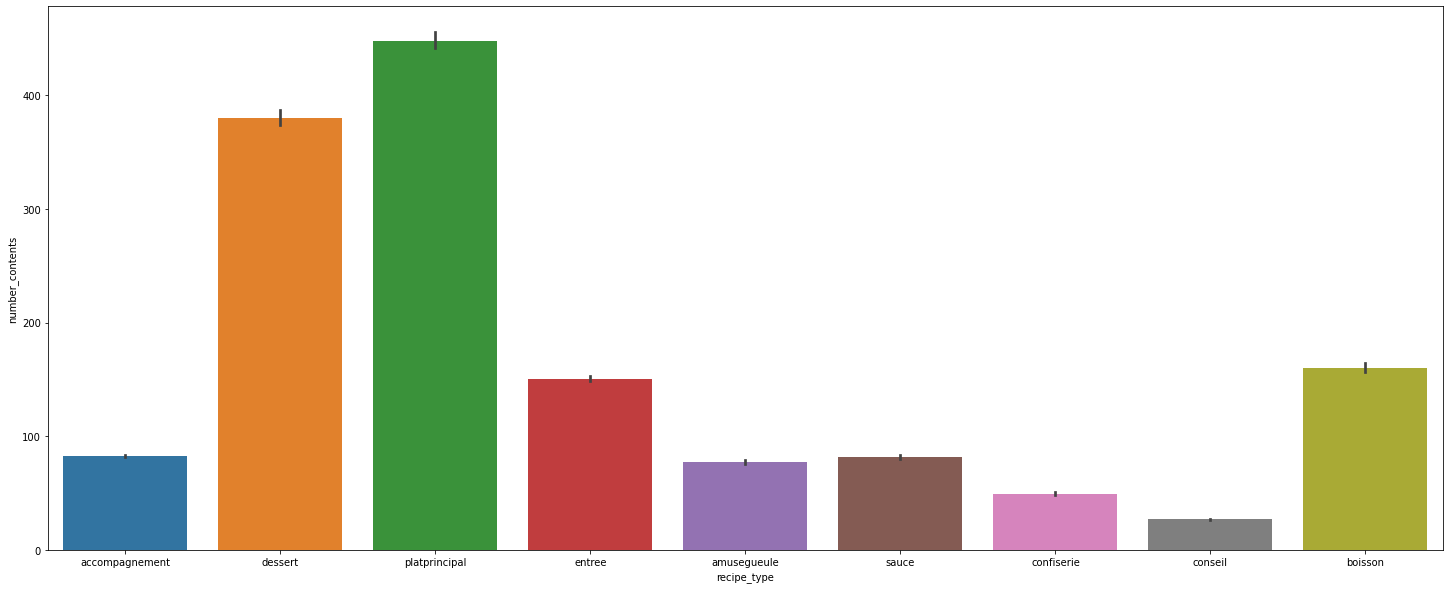

In [282]:
plt.figure(figsize=(25, 10))
sns.barplot(data = final_df, x='recipe_type', y='number_contents')

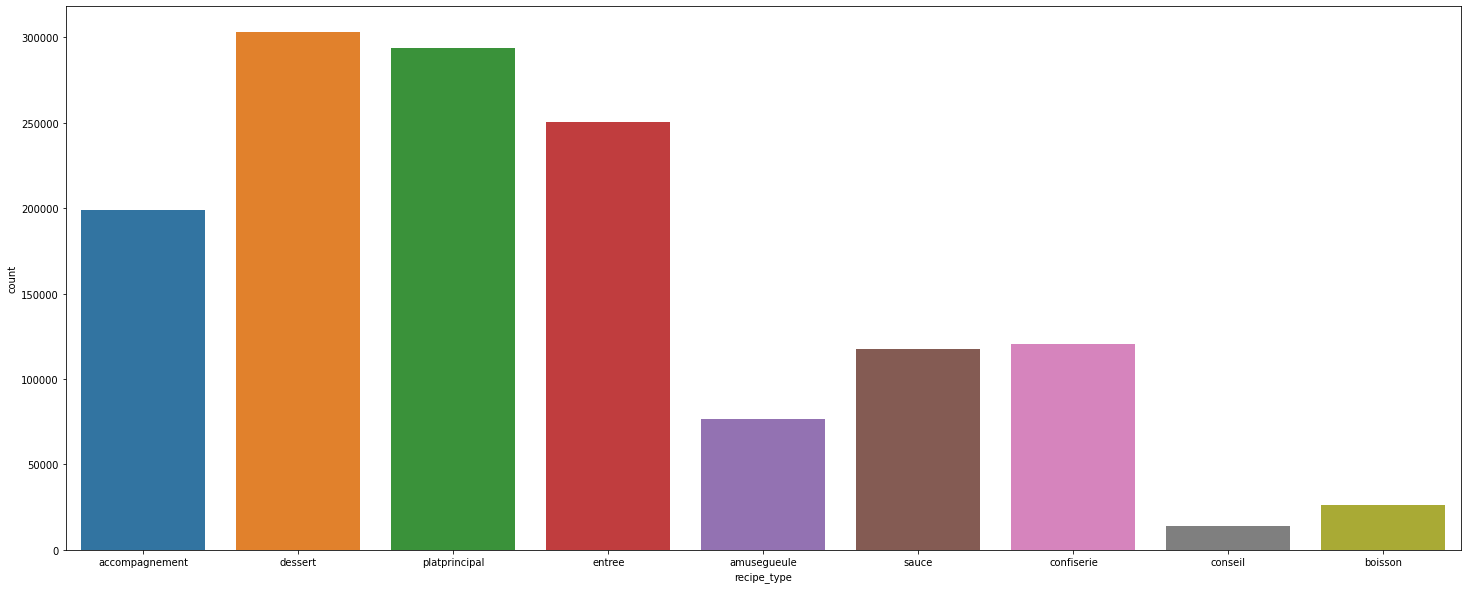

In [289]:
import seaborn as sns
plt.figure(figsize=(25, 10))
ax = sns.countplot(x="recipe_type", data=final_df)

<AxesSubplot:xlabel='recipe_type', ylabel='number_users'>

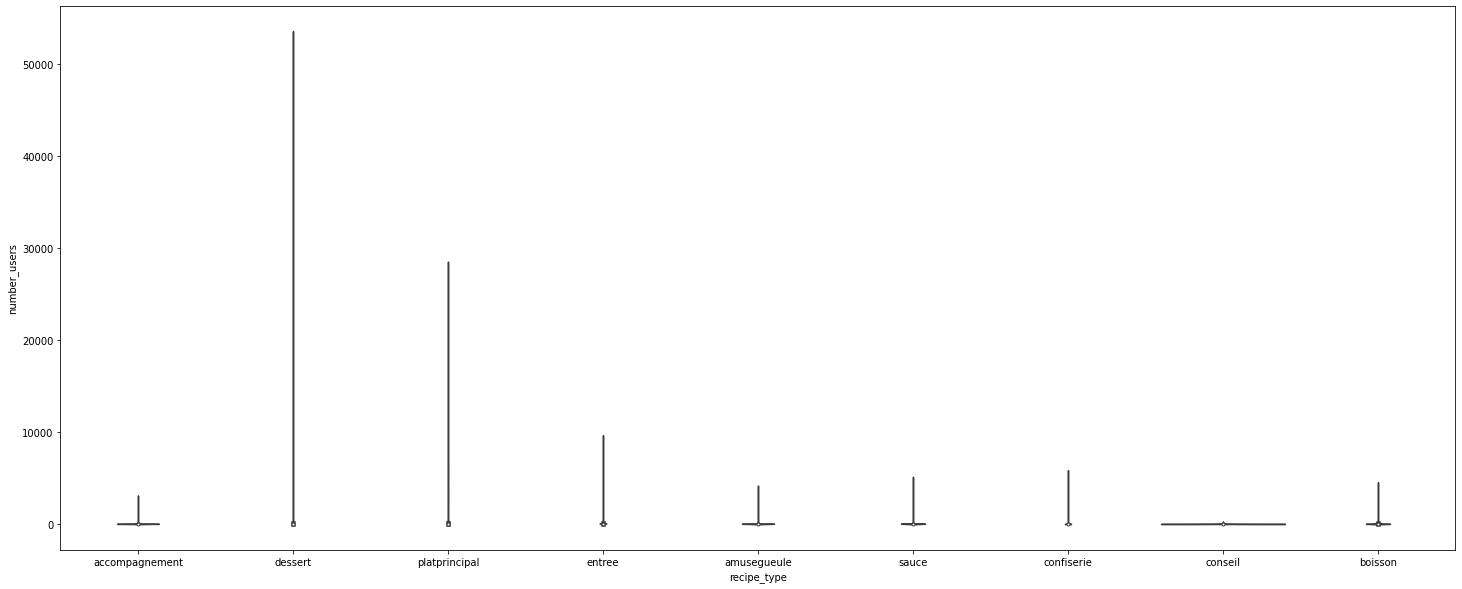

In [599]:
plt.figure(figsize=(25, 10))
sns.violinplot(data = final_df, x='recipe_type', y='number_users')

### 5. Recipes by region

<AxesSubplot:xlabel='region_name', ylabel='number_contents'>

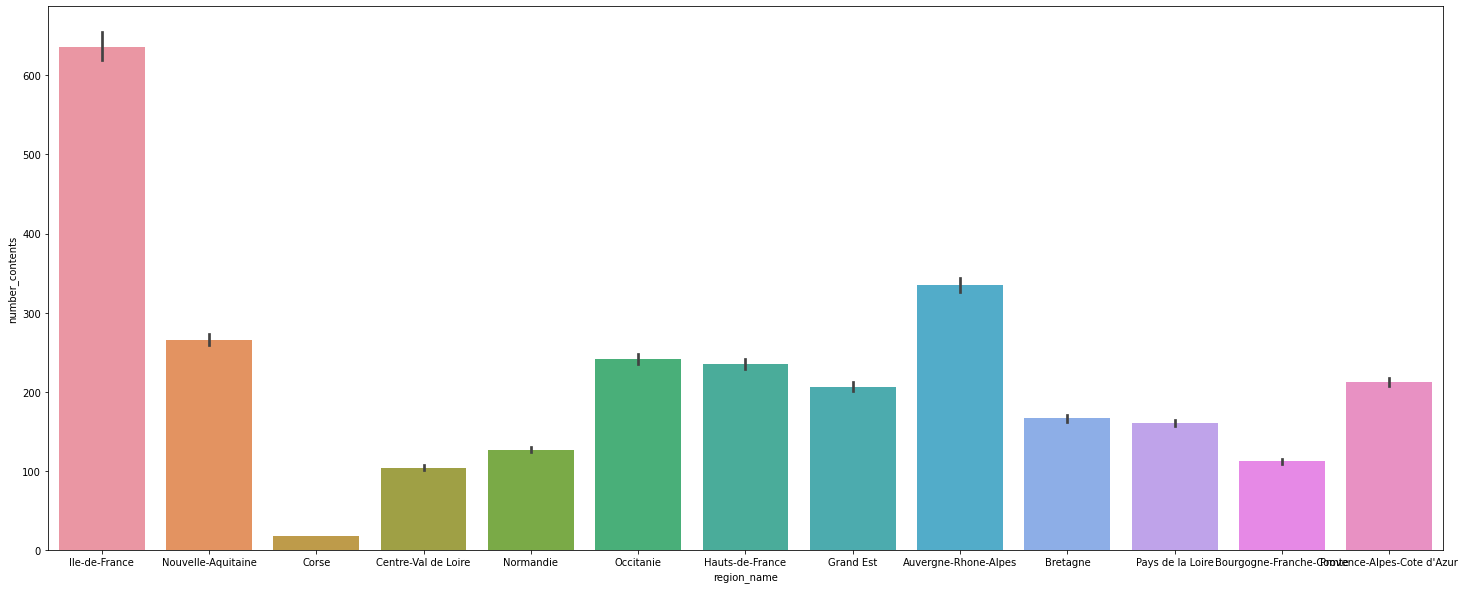

In [601]:
plt.figure(figsize=(25, 10))
sns.barplot(data = final_df, x='region_name', y='number_contents')

### 6. Users by region

<AxesSubplot:xlabel='region_name', ylabel='number_users'>

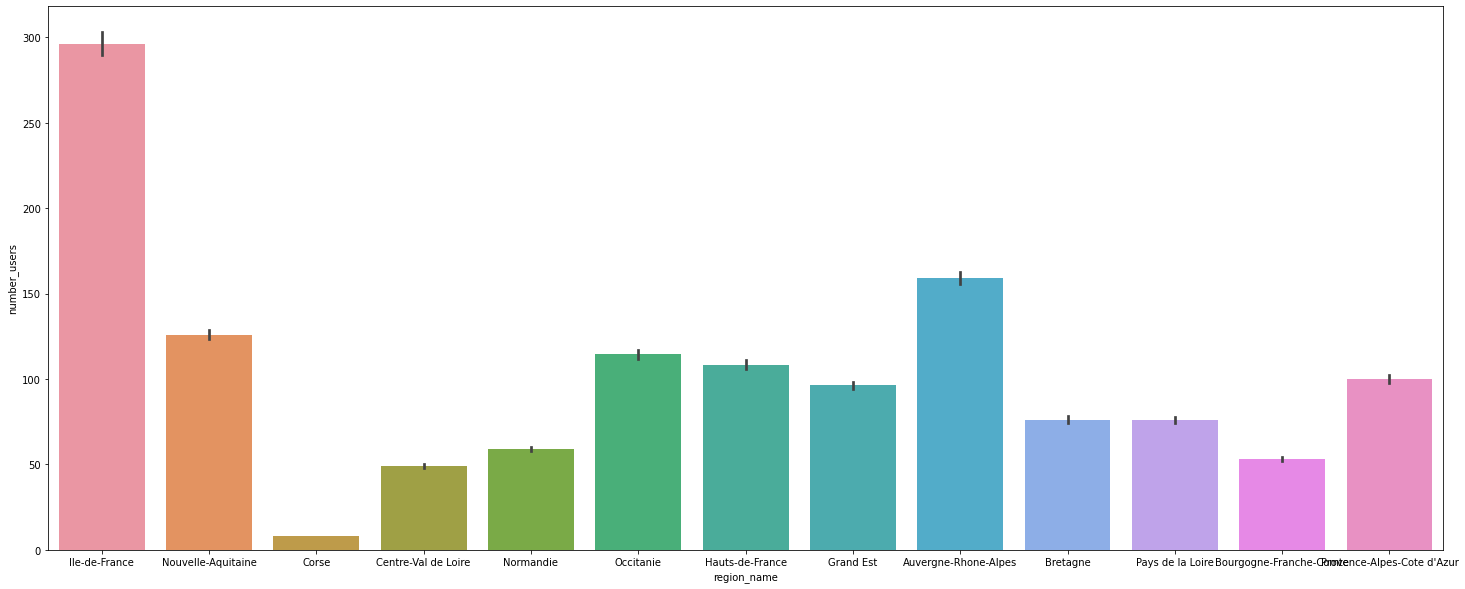

In [602]:
plt.figure(figsize=(25, 10))
sns.barplot(data = final_df, x='region_name', y='number_users')

### 7. Ratings repartition


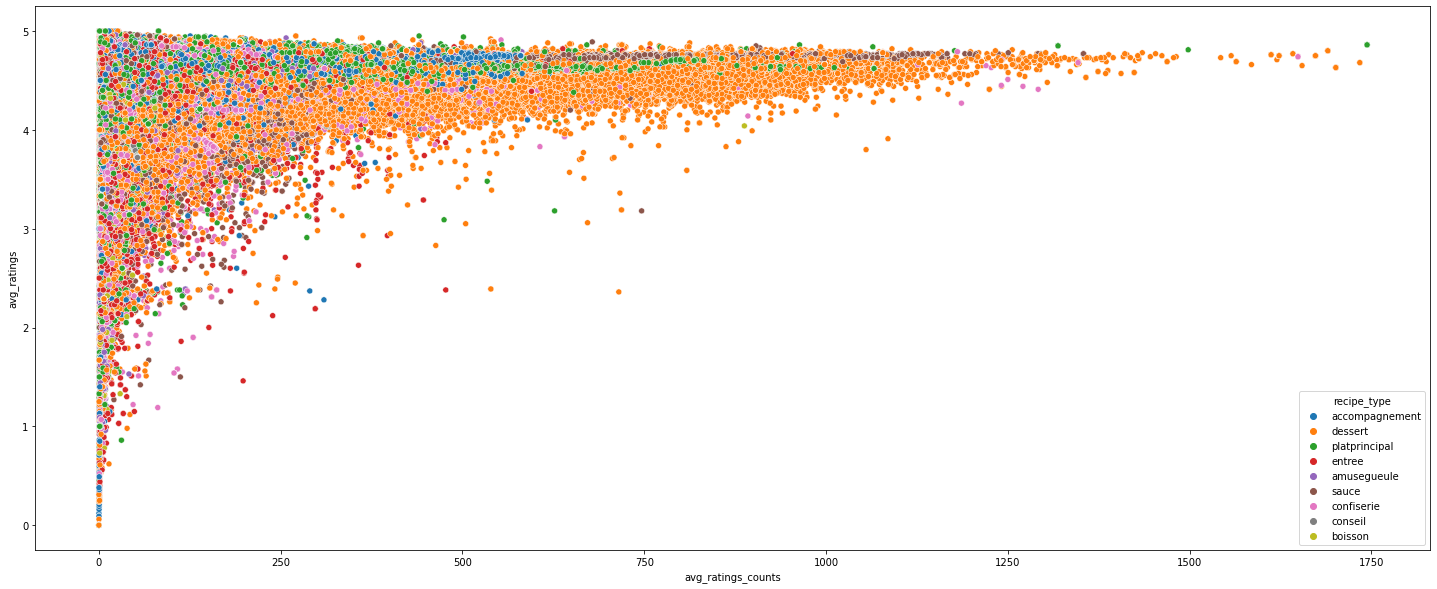

In [606]:
plt.figure(figsize=(25, 10))
sns.scatterplot(data = final_df, x='avg_ratings_counts', y='avg_ratings', hue=final_df['recipe_type'])
params = {'legend.fontsize': 16,
          'legend.handlelength': 3}

<AxesSubplot:xlabel='region_name', ylabel='avg_ratings'>

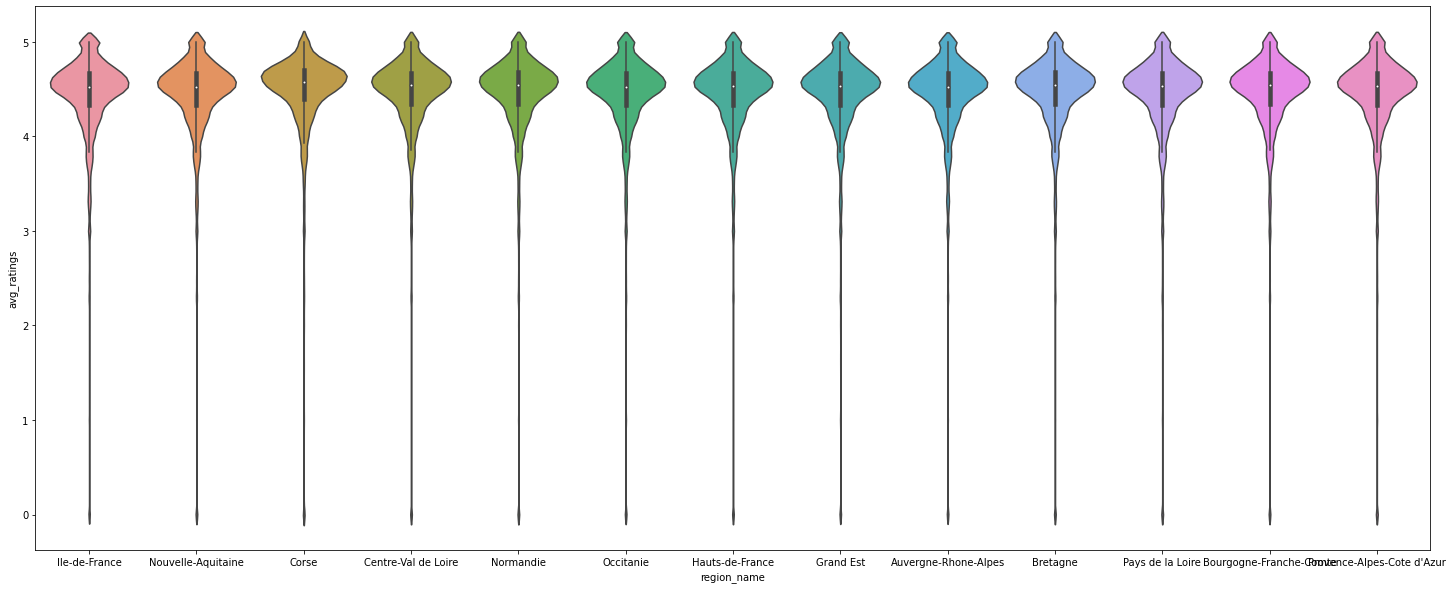

In [607]:
# Ratings repartition by region

plt.figure(figsize=(25, 10))
sns.violinplot(data = final_df, x='region_name', y='avg_ratings')

<AxesSubplot:xlabel='recipe_type', ylabel='avg_ratings'>

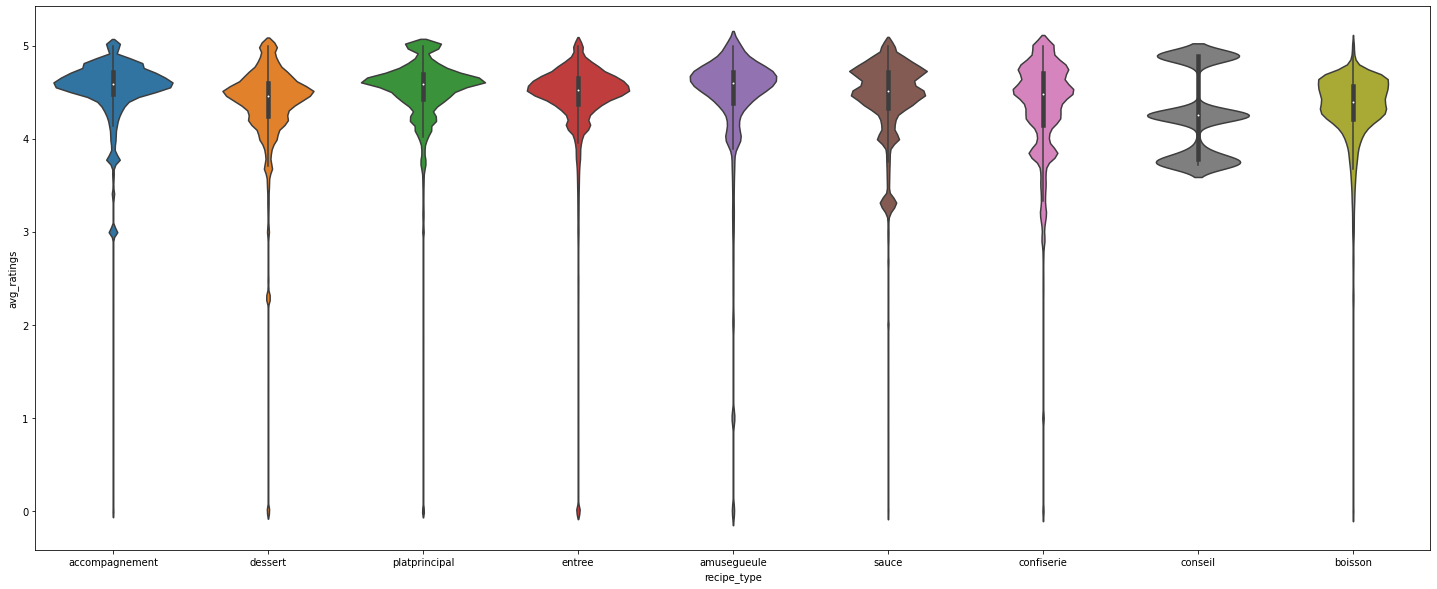

In [608]:
plt.figure(figsize=(25, 10))
sns.violinplot(data = final_df, x='recipe_type', y='avg_ratings')

### 8. Recipes with video repartition


<AxesSubplot:xlabel='region_name', ylabel='ratio_recipes_with_video'>

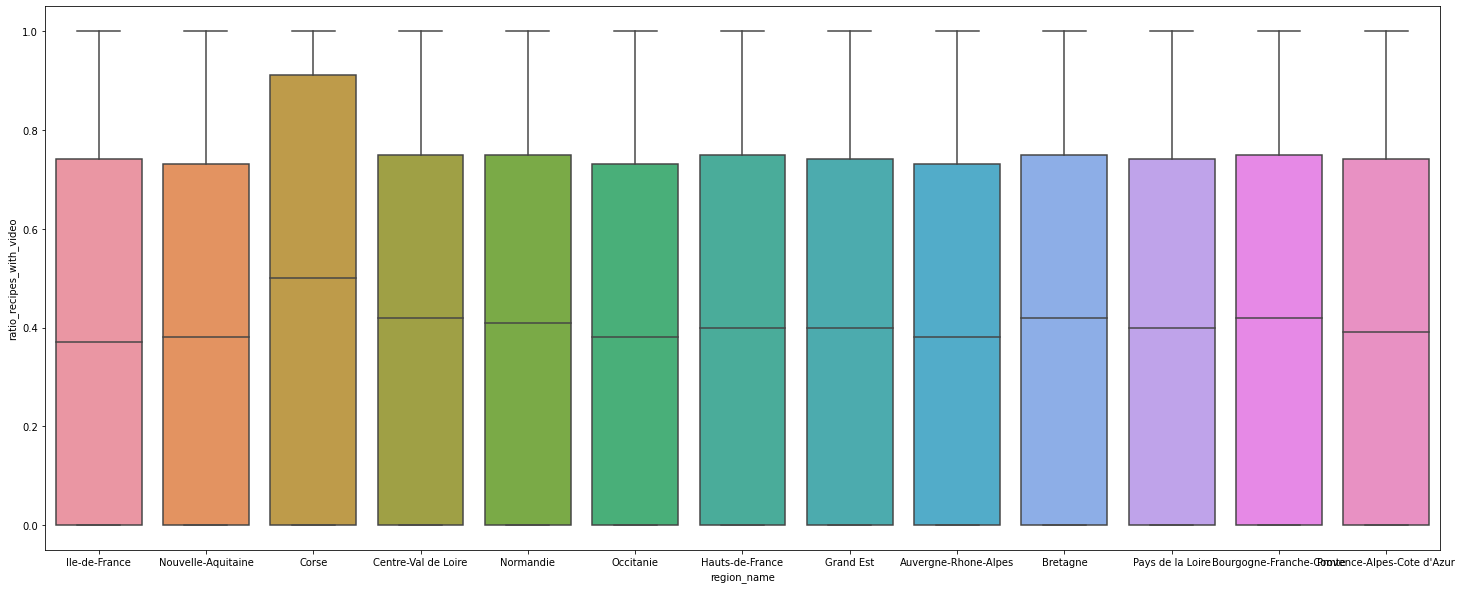

In [609]:
total_video = final_df.groupby('region_name')[['ratio_recipes_with_video']].mean()

plt.figure(figsize=(25, 10))
sns.boxplot(data=total_video,
            y=final_df['ratio_recipes_with_video'],
            x=final_df['region_name'])

<AxesSubplot:xlabel='region_name', ylabel='ratio_recipes_with_picture'>

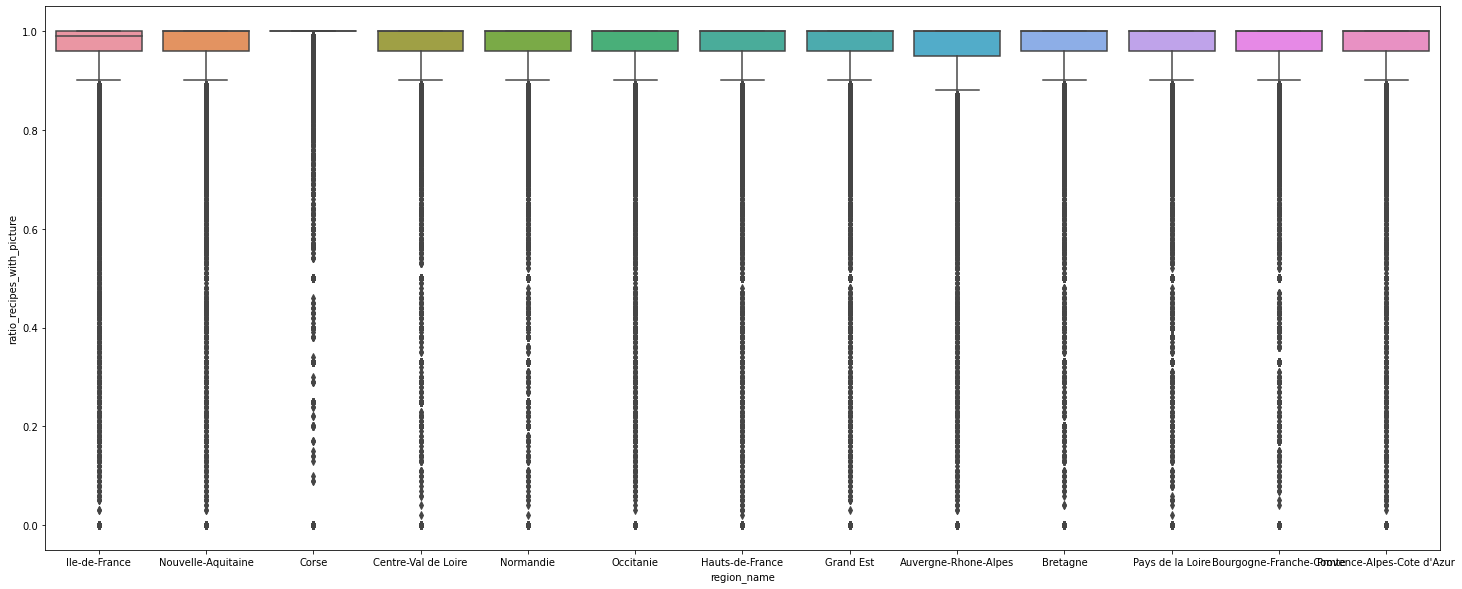

In [610]:
total_picture = final_df.groupby('region_name')[['ratio_recipes_with_picture']].mean()

plt.figure(figsize=(25, 10))
sns.boxplot(data=total_picture,
            y=final_df['ratio_recipes_with_picture'],
            x=final_df['region_name'])

### 9. Recipes cost repartition


([<matplotlib.patches.Wedge at 0x7fc974d66610>,
 [Text(-0.6387754610694314, -0.8955254939618055, 'bon marche'),
  Text(0.6788386363407483, 0.8655507528799414, 'moyen'),
  Text(0.05002237980140956, 1.0988620302472025, 'assez cher')],
 [Text(-0.34842297876514433, -0.48846845125189386, '80.3%'),
  Text(0.3702756198222263, 0.472118592479968, '18.3%'),
  Text(0.027284934437132487, 0.5993792892257467, '1.4%')])

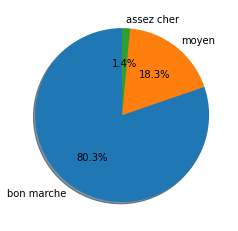

In [611]:
# Repartition according to cost, for all regions
labels = 'bon marche', 'moyen', 'assez cher'
sizes = [final_df['ratio_recipes_cost_bon_marche'].mean(), final_df['ratio_recipes_cost_moyen'].mean(), final_df['ratio_recipes_cost_assez_cher'].mean()]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

In [ ]:
fig, ax= plt.subplots(figsize=(10, 20))
final_df.groupby('region_name')[['ratio_recipes_cost_bon_marche',
                                  'ratio_recipes_cost_moyen',
                                'ratio_recipes_cost_assez_cher']].mean().sort_values(by='ratio_recipes_cost_bon_marche').plot.barh(ax=ax)

In [ ]:
# Repartition according to cost global IDF
labels = 'bon marche', 'moyen', 'assez cher'
sizes = [df_sample.loc[df_sample['region_name']=='Ile-de-France']['ratio_recipes_cost_bon_marche'].mean(), df_sample.loc[df_sample['region_name']=='Ile-de-France']['ratio_recipes_cost_moyen'].mean(), df_sample.loc[df_sample['region_name']=='Ile-de-France']['ratio_recipes_cost_assez_cher'].mean()]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title("IDF")

# Repartition according to cost global Auvergne-Rhone-Alpes
labels = 'bon marche', 'moyen', 'assez cher'
sizes = [df_sample.loc[df_sample['region_name']=='Auvergne-Rhone-Alpes']['ratio_recipes_cost_bon_marche'].mean(), df_sample.loc[df_sample['region_name']=='Auvergne-Rhone-Alpes']['ratio_recipes_cost_moyen'].mean(), df_sample.loc[df_sample['region_name']=='Auvergne-Rhone-Alpes']['ratio_recipes_cost_assez_cher'].mean()]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title("Auvergne-Rhone-Alpes")

# Repartition according to cost global Bretagne
labels = 'bon marche', 'moyen', 'assez cher'
sizes = [df_sample.loc[df_sample['region_name']=='Bretagne']['ratio_recipes_cost_bon_marche'].mean(), df_sample.loc[df_sample['region_name']=='Bretagne']['ratio_recipes_cost_moyen'].mean(), df_sample.loc[df_sample['region_name']=='Bretagne']['ratio_recipes_cost_assez_cher'].mean()]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title("Bretagne")

# Repartition according to cost global Nouvelle-Aquitaine
labels = 'bon marche', 'moyen', 'assez cher'
sizes = [df_sample.loc[df_sample['region_name']=='Nouvelle-Aquitaine']['ratio_recipes_cost_bon_marche'].mean(), df_sample.loc[df_sample['region_name']=='Nouvelle-Aquitaine']['ratio_recipes_cost_moyen'].mean(), df_sample.loc[df_sample['region_name']=='Nouvelle-Aquitaine']['ratio_recipes_cost_assez_cher'].mean()]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title("Nouvelle-Aquitaine")

# Repartition according to cost global Occitanie
labels = 'bon marche', 'moyen', 'assez cher'
sizes = [df_sample.loc[df_sample['region_name']=='Occitanie']['ratio_recipes_cost_bon_marche'].mean(), df_sample.loc[df_sample['region_name']=='Occitanie']['ratio_recipes_cost_moyen'].mean(), df_sample.loc[df_sample['region_name']=='Occitanie']['ratio_recipes_cost_assez_cher'].mean()]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title("Occitanie")

# Repartition according to cost global Provence-Alpes-Cote d'Azur
labels = 'bon marche', 'moyen', 'assez cher'
sizes = [df_sample.loc[df_sample['region_name']=="Provence-Alpes-Cote d'Azur"]['ratio_recipes_cost_bon_marche'].mean(), df_sample.loc[df_sample['region_name']=="Provence-Alpes-Cote d'Azur"]['ratio_recipes_cost_moyen'].mean(), df_sample.loc[df_sample['region_name']=="Provence-Alpes-Cote d'Azur"]['ratio_recipes_cost_assez_cher'].mean()]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title("Provence-Alpes-Cote d'Azur")


# Repartition according to cost global Hauts-de-France
labels = 'bon marche', 'moyen', 'assez cher'
sizes = [df_sample.loc[df_sample['region_name']=="Hauts-de-France"]['ratio_recipes_cost_bon_marche'].mean(), df_sample.loc[df_sample['region_name']=="Hauts-de-France"]['ratio_recipes_cost_moyen'].mean(), df_sample.loc[df_sample['region_name']=="Hauts-de-France"]['ratio_recipes_cost_assez_cher'].mean()]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title("Hauts-de-France")

# Repartition according to cost global Grand Est
labels = 'bon marche', 'moyen', 'assez cher'
sizes = [df_sample.loc[df_sample['region_name']=="Grand Est"]['ratio_recipes_cost_bon_marche'].mean(), df_sample.loc[df_sample['region_name']=="Grand Est"]['ratio_recipes_cost_moyen'].mean(), df_sample.loc[df_sample['region_name']=="Grand Est"]['ratio_recipes_cost_assez_cher'].mean()]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title("Grand Est")

# Repartition according to cost global Pays de la Loire
labels = 'bon marche', 'moyen', 'assez cher'
sizes = [df_sample.loc[df_sample['region_name']=="Pays de la Loire"]['ratio_recipes_cost_bon_marche'].mean(), df_sample.loc[df_sample['region_name']=="Pays de la Loire"]['ratio_recipes_cost_moyen'].mean(), df_sample.loc[df_sample['region_name']=="Pays de la Loire"]['ratio_recipes_cost_assez_cher'].mean()]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title("Pays de la Loire")

# Repartition according to cost global Normandie
labels = 'bon marche', 'moyen', 'assez cher'
sizes = [df_sample.loc[df_sample['region_name']=="Normandie"]['ratio_recipes_cost_bon_marche'].mean(), df_sample.loc[df_sample['region_name']=="Normandie"]['ratio_recipes_cost_moyen'].mean(), df_sample.loc[df_sample['region_name']=="Normandie"]['ratio_recipes_cost_assez_cher'].mean()]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title("Normandie")

# Repartition according to cost global Bourgogne-Franche-Comte
labels = 'bon marche', 'moyen', 'assez cher'
sizes = [df_sample.loc[df_sample['region_name']=="Bourgogne-Franche-Comte"]['ratio_recipes_cost_bon_marche'].mean(), df_sample.loc[df_sample['region_name']=="Bourgogne-Franche-Comte"]['ratio_recipes_cost_moyen'].mean(), df_sample.loc[df_sample['region_name']=="Bourgogne-Franche-Comte"]['ratio_recipes_cost_assez_cher'].mean()]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title("Bourgogne-Franche-Comte")

# Repartition according to cost global Centre-Val de Loire
labels = 'bon marche', 'moyen', 'assez cher'
sizes = [df_sample.loc[df_sample['region_name']=="Centre-Val de Loire"]['ratio_recipes_cost_bon_marche'].mean(), df_sample.loc[df_sample['region_name']=="Centre-Val de Loire"]['ratio_recipes_cost_moyen'].mean(), df_sample.loc[df_sample['region_name']=="Centre-Val de Loire"]['ratio_recipes_cost_assez_cher'].mean()]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title("Centre-Val de Loire")

# Repartition according to cost global Corse
labels = 'bon marche', 'moyen', 'assez cher'
sizes = [df_sample.loc[df_sample['region_name']=="Corse"]['ratio_recipes_cost_bon_marche'].mean(), df_sample.loc[df_sample['region_name']=="Corse"]['ratio_recipes_cost_moyen'].mean(), df_sample.loc[df_sample['region_name']=="Corse"]['ratio_recipes_cost_assez_cher'].mean()]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title("Corse")


<AxesSubplot:xlabel='region_name', ylabel='ratio_recipes_cost_bon_marche'>

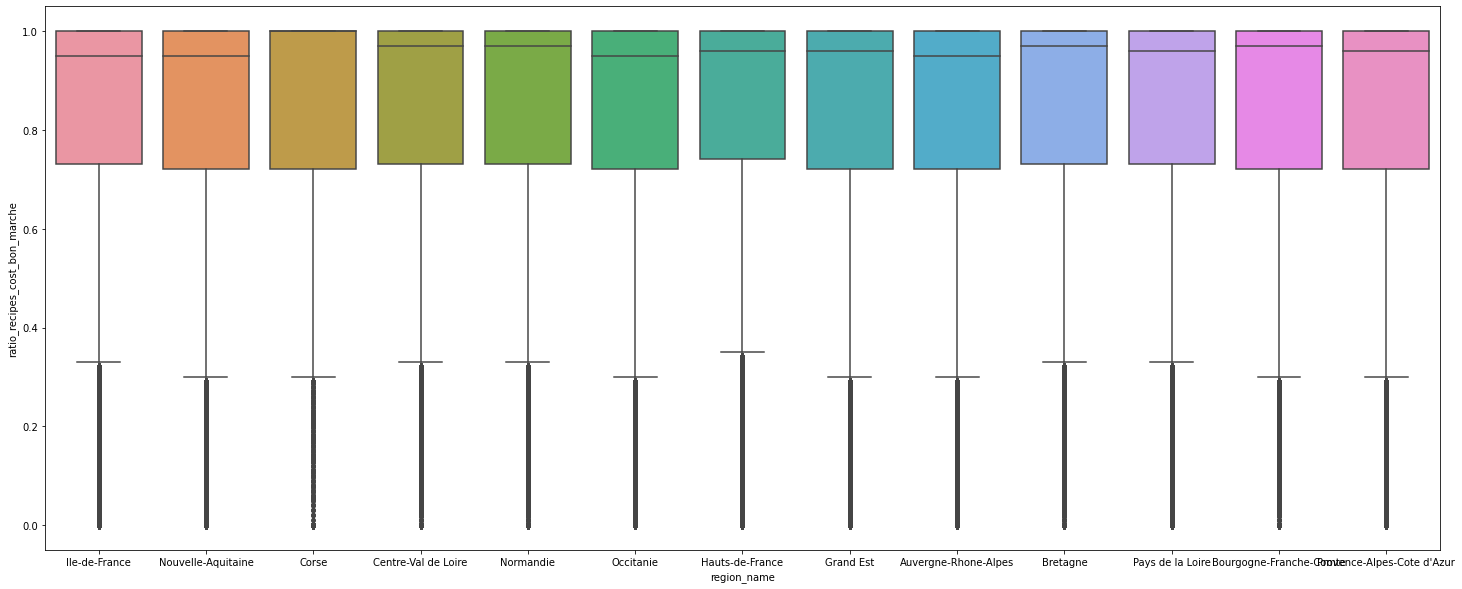

In [612]:
total_bon_marche = final_df.groupby('region_name')[['ratio_recipes_cost_bon_marche']].mean()

plt.figure(figsize=(25, 10))
sns.boxplot(data=total_bon_marche,
            y=final_df['ratio_recipes_cost_bon_marche'],
            x=final_df['region_name'])

<AxesSubplot:xlabel='region_name', ylabel='ratio_recipes_cost_moyen'>

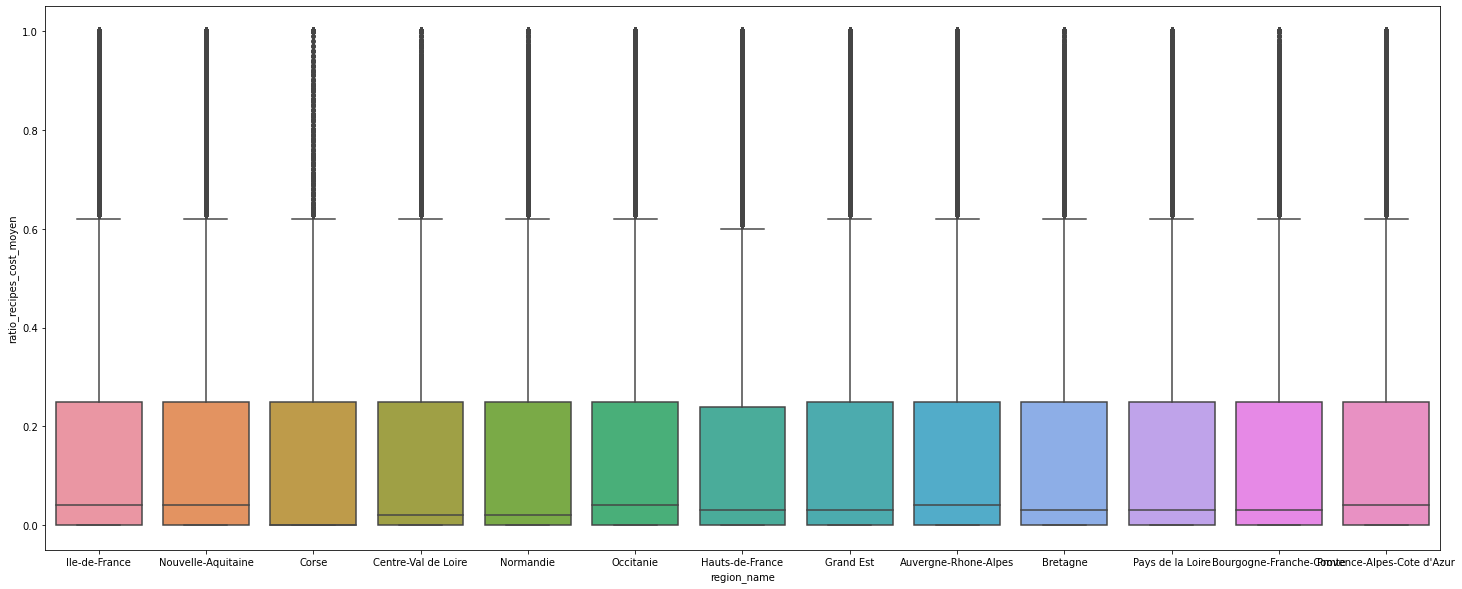

In [613]:
total_prix_moyen = final_df.groupby('region_name')[['ratio_recipes_cost_moyen']].mean()

plt.figure(figsize=(25, 10))
sns.boxplot(data=total_prix_moyen,
            y=final_df['ratio_recipes_cost_moyen'],
            x=final_df['region_name'])

<AxesSubplot:xlabel='region_name', ylabel='ratio_recipes_cost_assez_cher'>

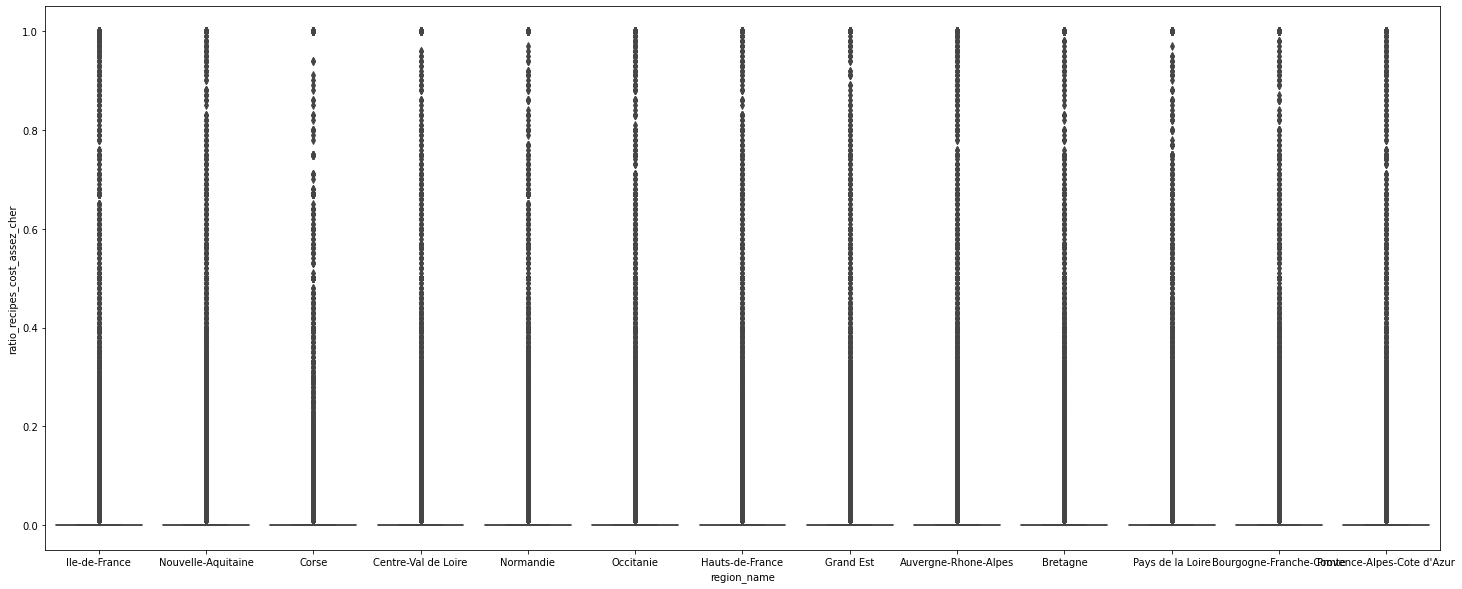

In [614]:
total_assez_cher = final_df.groupby('region_name')[['ratio_recipes_cost_assez_cher']].mean()

plt.figure(figsize=(25, 10))
sns.boxplot(data=total_assez_cher,
            y=final_df['ratio_recipes_cost_assez_cher'],
            x=final_df['region_name'])

### 10. Repartition device

([<matplotlib.patches.Wedge at 0x7fc974f16f10>,
 [Text(-0.969098226812798, -0.5204311931353567, 'Mobile'),
  Text(1.0821385316851695, 0.19742390494128523, 'Desktop'),
  Text(0.3380505933477805, 1.046767307636809, 'Tablet')],
 [Text(-0.5285990328069806, -0.28387155989201274, '65.7%'),
  Text(0.5902573809191833, 0.10768576633161012, '24.4%'),
  Text(0.18439123273515295, 0.5709639859837139, '9.9%')])

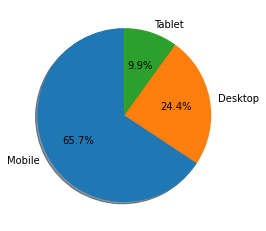

In [615]:
# Repartition according to device global, for all regions
labels = 'Mobile', 'Desktop', 'Tablet'
sizes = [final_df['ratio_sessions_from_mobile'].mean(), final_df['ratio_sessions_from_desktop'].mean(), final_df['ratio_sessions_from_tablet'].mean()]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

Text(0.5, 1.0, 'Corse')

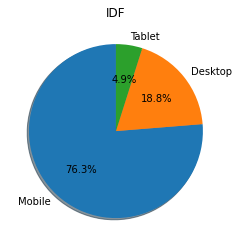

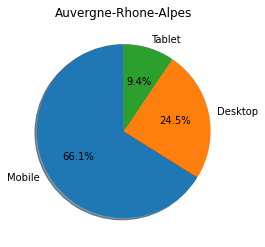

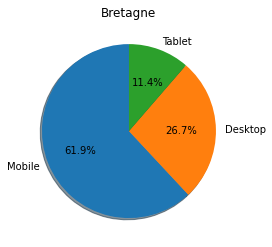

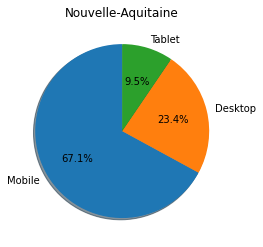

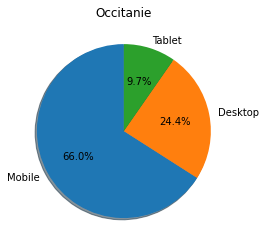

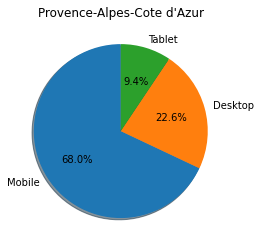

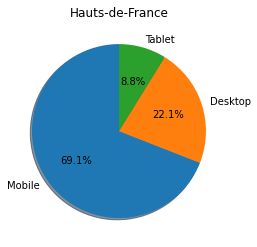

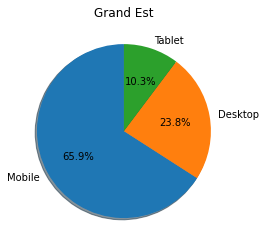

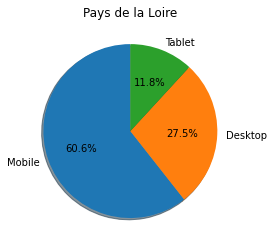

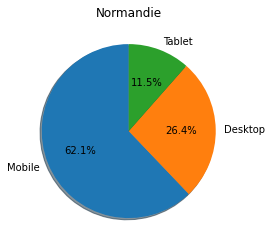

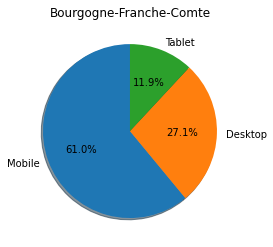

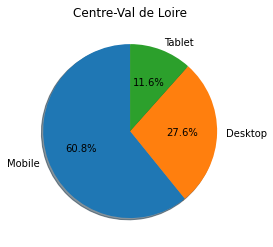

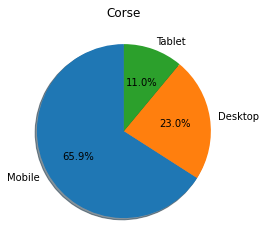

In [616]:
# Repartition according to device global IDF
labels = 'Mobile', 'Desktop', 'Tablet'
sizes = [final_df.loc[final_df['region_name']=='Ile-de-France']['ratio_sessions_from_mobile'].mean(), final_df.loc[final_df['region_name']=='Ile-de-France']['ratio_sessions_from_desktop'].mean(), final_df.loc[final_df['region_name']=='Ile-de-France']['ratio_sessions_from_tablet'].mean()]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title("IDF")

# Repartition according to device global Auvergne-Rhone-Alpes
labels = 'Mobile', 'Desktop', 'Tablet'
sizes = [final_df.loc[final_df['region_name']=='Auvergne-Rhone-Alpes']['ratio_sessions_from_mobile'].mean(), final_df.loc[final_df['region_name']=='Auvergne-Rhone-Alpes']['ratio_sessions_from_desktop'].mean(), final_df.loc[final_df['region_name']=='Auvergne-Rhone-Alpes']['ratio_sessions_from_tablet'].mean()]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title("Auvergne-Rhone-Alpes")

# Repartition according to device global Bretagne
labels = 'Mobile', 'Desktop', 'Tablet'
sizes = [final_df.loc[final_df['region_name']=='Bretagne']['ratio_sessions_from_mobile'].mean(), final_df.loc[final_df['region_name']=='Bretagne']['ratio_sessions_from_desktop'].mean(), final_df.loc[final_df['region_name']=='Bretagne']['ratio_sessions_from_tablet'].mean()]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title("Bretagne")

# Repartition according to device global Nouvelle-Aquitaine
labels = 'Mobile', 'Desktop', 'Tablet'
sizes = [final_df.loc[final_df['region_name']=='Nouvelle-Aquitaine']['ratio_sessions_from_mobile'].mean(), final_df.loc[final_df['region_name']=='Nouvelle-Aquitaine']['ratio_sessions_from_desktop'].mean(), final_df.loc[final_df['region_name']=='Nouvelle-Aquitaine']['ratio_sessions_from_tablet'].mean()]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title("Nouvelle-Aquitaine")

# Repartition according to device global Occitanie
labels = 'Mobile', 'Desktop', 'Tablet'
sizes = [final_df.loc[final_df['region_name']=='Occitanie']['ratio_sessions_from_mobile'].mean(), final_df.loc[final_df['region_name']=='Occitanie']['ratio_sessions_from_desktop'].mean(), final_df.loc[final_df['region_name']=='Occitanie']['ratio_sessions_from_tablet'].mean()]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title("Occitanie")

# Repartition according to device global Provence-Alpes-Cote d'Azur
labels = 'Mobile', 'Desktop', 'Tablet'
sizes = [final_df.loc[final_df['region_name']=="Provence-Alpes-Cote d'Azur"]['ratio_sessions_from_mobile'].mean(), final_df.loc[final_df['region_name']=="Provence-Alpes-Cote d'Azur"]['ratio_sessions_from_desktop'].mean(), final_df.loc[final_df['region_name']=="Provence-Alpes-Cote d'Azur"]['ratio_sessions_from_tablet'].mean()]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title("Provence-Alpes-Cote d'Azur")


# Repartition according to device global Hauts-de-France
labels = 'Mobile', 'Desktop', 'Tablet'
sizes = [final_df.loc[final_df['region_name']=="Hauts-de-France"]['ratio_sessions_from_mobile'].mean(), final_df.loc[final_df['region_name']=="Hauts-de-France"]['ratio_sessions_from_desktop'].mean(), final_df.loc[final_df['region_name']=="Hauts-de-France"]['ratio_sessions_from_tablet'].mean()]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title("Hauts-de-France")

# Repartition according to device global Grand Est
labels = 'Mobile', 'Desktop', 'Tablet'
sizes = [final_df.loc[final_df['region_name']=="Grand Est"]['ratio_sessions_from_mobile'].mean(), final_df.loc[final_df['region_name']=="Grand Est"]['ratio_sessions_from_desktop'].mean(), final_df.loc[final_df['region_name']=="Grand Est"]['ratio_sessions_from_tablet'].mean()]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title("Grand Est")

# Repartition according to device global Pays de la Loire
labels = 'Mobile', 'Desktop', 'Tablet'
sizes = [final_df.loc[final_df['region_name']=="Pays de la Loire"]['ratio_sessions_from_mobile'].mean(), final_df.loc[final_df['region_name']=="Pays de la Loire"]['ratio_sessions_from_desktop'].mean(), final_df.loc[final_df['region_name']=="Pays de la Loire"]['ratio_sessions_from_tablet'].mean()]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title("Pays de la Loire")

# Repartition according to device global Normandie
labels = 'Mobile', 'Desktop', 'Tablet'
sizes = [final_df.loc[final_df['region_name']=="Normandie"]['ratio_sessions_from_mobile'].mean(), final_df.loc[final_df['region_name']=="Normandie"]['ratio_sessions_from_desktop'].mean(), final_df.loc[final_df['region_name']=="Normandie"]['ratio_sessions_from_tablet'].mean()]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title("Normandie")

# Repartition according to device global Bourgogne-Franche-Comte
labels = 'Mobile', 'Desktop', 'Tablet'
sizes = [final_df.loc[final_df['region_name']=="Bourgogne-Franche-Comte"]['ratio_sessions_from_mobile'].mean(), final_df.loc[final_df['region_name']=="Bourgogne-Franche-Comte"]['ratio_sessions_from_desktop'].mean(), final_df.loc[final_df['region_name']=="Bourgogne-Franche-Comte"]['ratio_sessions_from_tablet'].mean()]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title("Bourgogne-Franche-Comte")

# Repartition according to device global Centre-Val de Loire
labels = 'Mobile', 'Desktop', 'Tablet'
sizes = [final_df.loc[final_df['region_name']=="Centre-Val de Loire"]['ratio_sessions_from_mobile'].mean(), final_df.loc[final_df['region_name']=="Centre-Val de Loire"]['ratio_sessions_from_desktop'].mean(), final_df.loc[final_df['region_name']=="Centre-Val de Loire"]['ratio_sessions_from_tablet'].mean()]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title("Centre-Val de Loire")

# Repartition according to device global Corse
labels = 'Mobile', 'Desktop', 'Tablet'
sizes = [final_df.loc[final_df['region_name']=="Corse"]['ratio_sessions_from_mobile'].mean(), final_df.loc[final_df['region_name']=="Corse"]['ratio_sessions_from_desktop'].mean(), final_df.loc[final_df['region_name']=="Corse"]['ratio_sessions_from_tablet'].mean()]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title("Corse")


In [ ]:
total_device = final_df.groupby('region_name')[['ratio_sessions_from_mobile']].mean()

plt.figure(figsize=(25, 10))
sns.boxplot(data=total_device,
            y=final_df['ratio_sessions_from_mobile'],
            x=final_df['region_name'])

In [ ]:
total_device = final_df.groupby('region_name')[['ratio_sessions_from_desktop']].mean()

plt.figure(figsize=(25, 10))
sns.boxplot(data=total_device,
            y=final_df['ratio_sessions_from_desktop'],
            x=final_df['region_name'])

In [ ]:
total_device = final_df.groupby('region_name')[['ratio_sessions_from_tablet']].mean()

plt.figure(figsize=(25, 10))
sns.boxplot(data=total_device,
            y=final_df['ratio_sessions_from_tablet'],
            x=final_df['region_name'])

### 11. Repartition origins


([<matplotlib.patches.Wedge at 0x7fc971e13df0>,
 [Text(-0.02436225984848112, 1.0997301852250283, 'From the homepage'),
  Text(0.024362301677675828, -1.099730184298388, 'Direct on the recipe')],
 [Text(-0.01328850537189879, 0.5998528283045609, '0.7%'),
  Text(0.013288528187823178, -0.5998528277991206, '99.3%')])

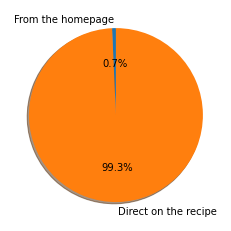

In [618]:
# For all regions
labels = 'From the homepage', 'Direct on the recipe'
sizes = [final_df['ratio_page_from_home'].mean(), 1 - final_df['ratio_page_from_home'].mean()]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

Text(0.5, 1.0, 'Sessions repartition by origin')

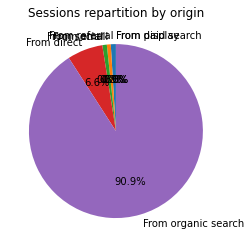

In [621]:
# For all regions
labels = 'From referral', 'From email', 'From social', 'From direct', 'From organic search', 'From paid search', 'From display'
sizes = [final_df['ratio_sessions_from_referral'].mean(), final_df['ratio_sessions_from_email'].mean(), final_df['ratio_sessions_from_social'].mean(), final_df['ratio_sessions_from_direct'].mean(), final_df['ratio_sessions_from_organic_search'].mean(), final_df['ratio_sessions_from_paid_search'].mean(), final_df['ratio_sessions_from_display'].mean()]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

plt.title("Sessions repartition by origin")
    

### 12. Repartition temperature


<AxesSubplot:xlabel='region_name', ylabel='Température (°C)'>

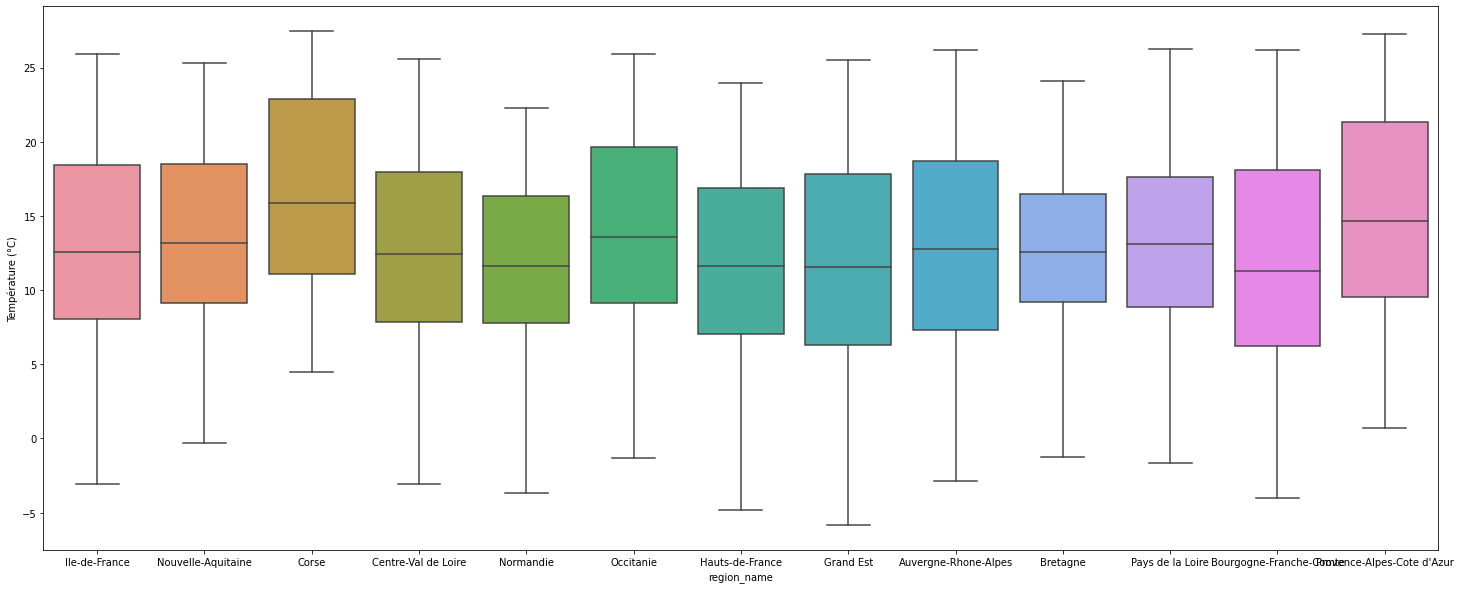

In [622]:
total_temp = final_df.groupby('region_name')[['Température (°C)']].mean()

plt.figure(figsize=(25, 10))
sns.boxplot(data=total_temp,
            y=final_df['Température (°C)'],
            x=final_df['region_name'])

### 13. Audience vs Temperature evolution


In [623]:
#df_sample_bis = final_df.loc[final_df.region_name=="Ile-de-France"].sort_values("date").copy()
df_sample_bis = final_df.sort_values("date").copy()
df_sample_bis = df_sample_bis.groupby(["date"])[["number_contents", "number_users", "Température (°C)"]].agg({"number_contents": np.sum, "number_users": np.sum, "Température (°C)": np.mean}).reset_index()

In [624]:
import matplotlib.dates as mdates
years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
yearsFmt = mdates.DateFormatter('%Y')

ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(months)

datemin = datetime.date(r.date.min().year, 1, 1)
datemax = datetime.date(r.date.max().year + 1, 1, 1)
ax.set_xlim(datemin, datemax)

ax.format_xdata = mdates.DateFormatter('%Y-%m')

ax.xaxis.set_major_locator(mdates.MonthLocator())
# Text in the x axis will be displayed in 'YYYY-mm' format.
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))
# Rotates and right-aligns the x labels so they don't crowd each other.
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right')

NameError: name 'ax' is not defined

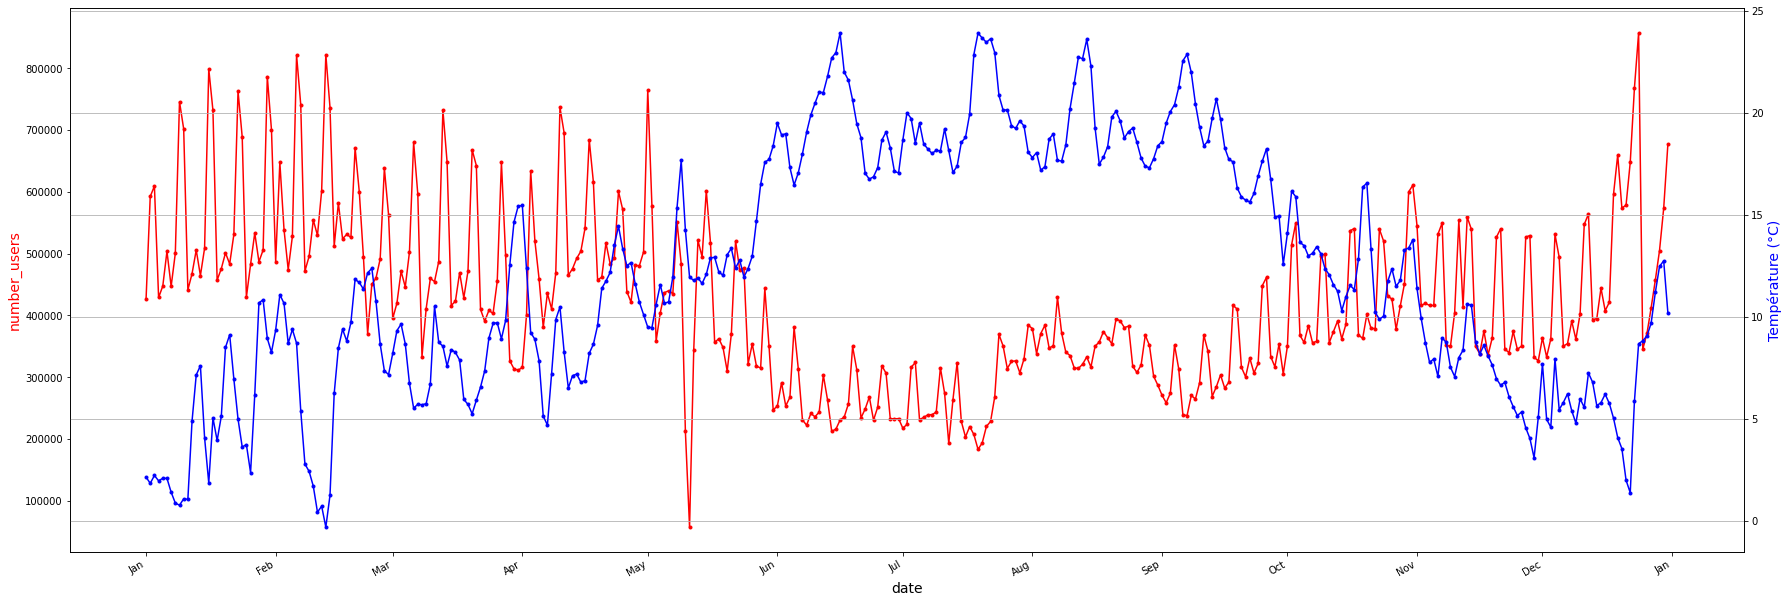

In [626]:
# Audience
fig,ax = plt.subplots(figsize=(30, 10))
# make a plot
ax.plot(df_sample_bis.date, df_sample_bis.number_users,
        color="red",
        marker=".")
# set x-axis label
ax.set_xlabel("date",fontsize=14)
# set y-axis label
ax.set_ylabel("number_users",color="red",fontsize=14)
ax.xaxis.set_major_locator(mdates.MonthLocator())
#ax.xaxis.set_major_formatter(myFmt)``
#years = mdates.YearLocator()   # every year
#months = mdates.MonthLocator()  # every month
#yearsFmt = mdates.DateFormatter('%m')

#ax.xaxis.set_major_locator(years)
#ax.xaxis.set_major_formatter(yearsFmt)
#ax.xaxis.set_minor_locator(months)
#ax.format_xdata = mdates.DateFormatter('%m')

ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(df_sample_bis.date, df_sample_bis["Température (°C)"],
         color="blue",
         marker=".")
ax2.set_ylabel("Température (°C)",color="blue",fontsize=14)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right')
#fig.autofmt_xdate(rotation=90)
#ax2.xaxis.set_major_formatter(myFmt)

plt.grid()
plt.show()

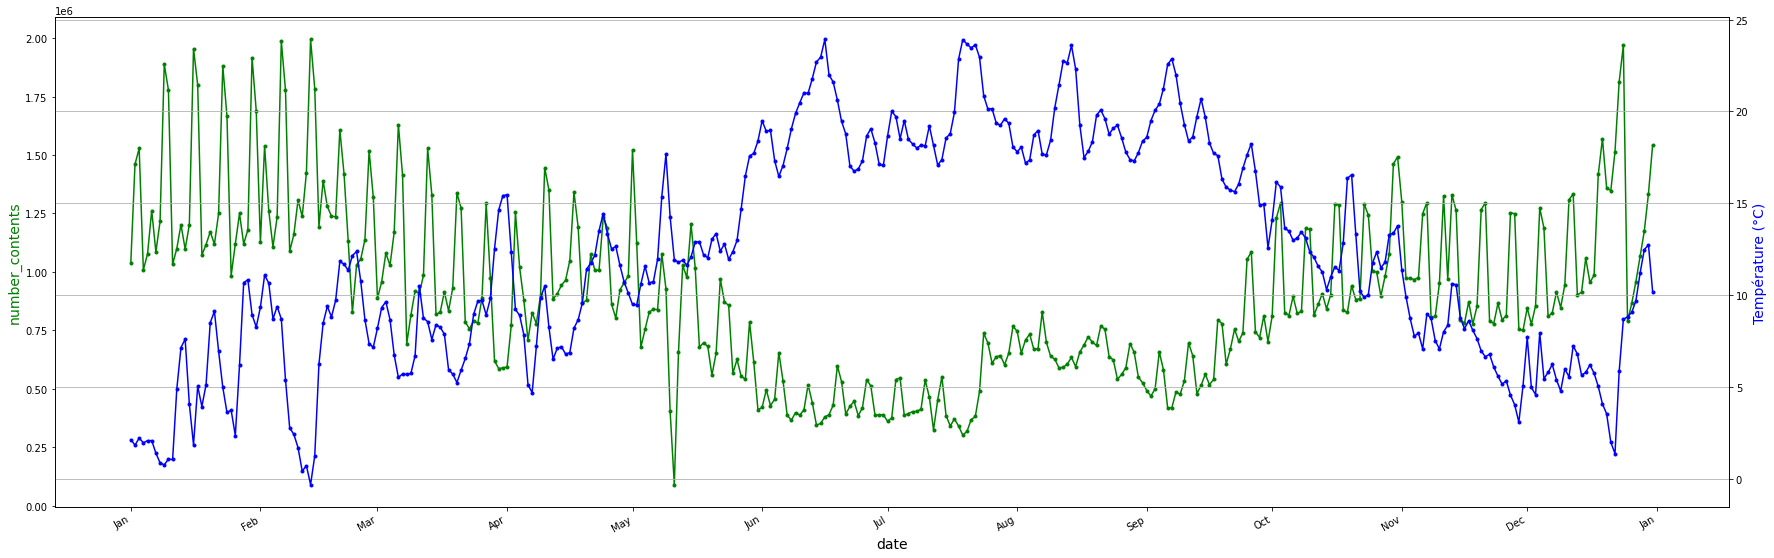

In [630]:
# Contents pageviews
fig,ax = plt.subplots(figsize=(30, 10))
# make a plot
ax.plot(df_sample_bis.date, df_sample_bis.number_contents,
        color="green",
        marker=".")
# set x-axis label
ax.set_xlabel("date",fontsize=14)
# set y-axis label
ax.set_ylabel("number_contents",color="green",fontsize=14)
ax.xaxis.set_major_locator(mdates.MonthLocator())


ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(df_sample_bis.date, df_sample_bis["Température (°C)"],
         color="blue",
         marker=".")
ax2.set_ylabel("Température (°C)",color="blue",fontsize=14)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
fig.autofmt_xdate()

plt.grid()
plt.show()

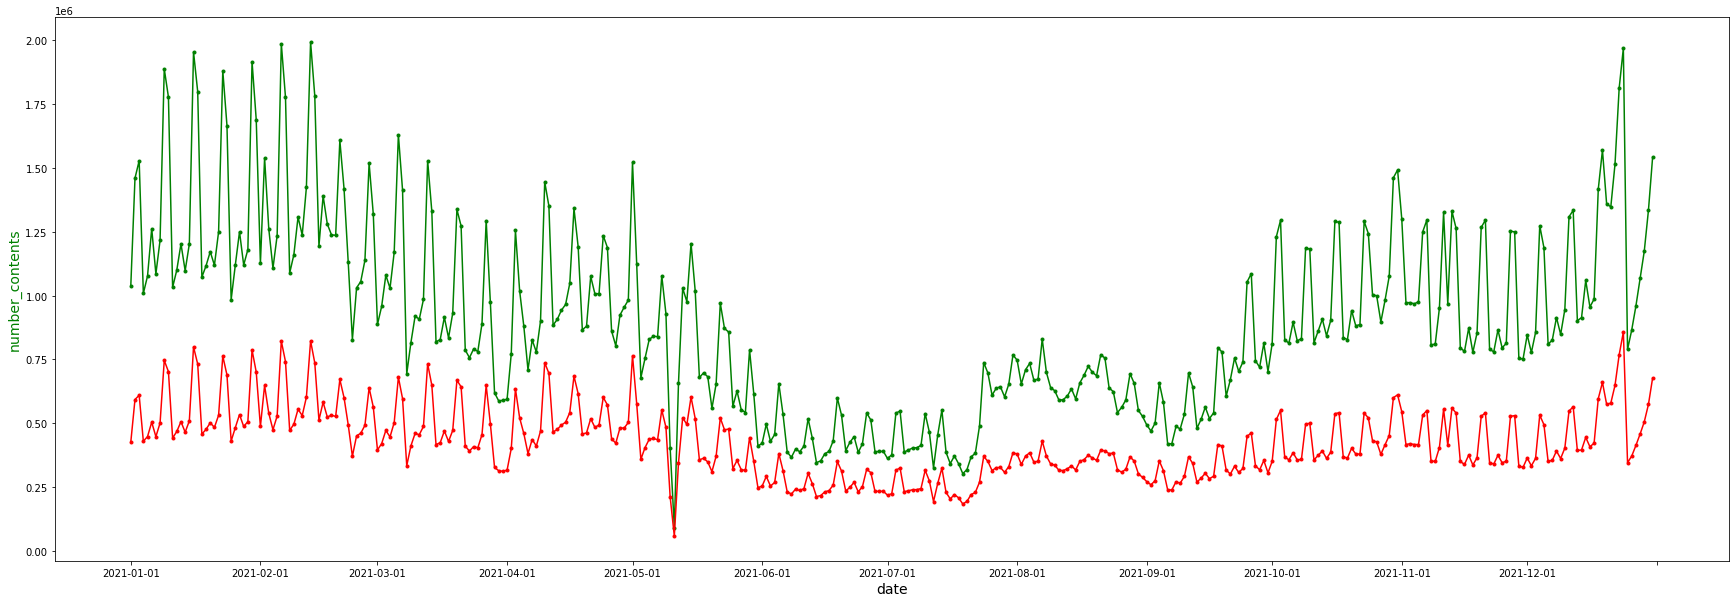

In [631]:
# Contents pageviews vs audience
fig,ax = plt.subplots(figsize=(30, 10))
# make a plot
ax.plot(df_sample_bis.date, df_sample_bis.number_contents,
        color="green",
        marker=".")
ax.plot(df_sample_bis.date, df_sample_bis["number_users"],
         color="red",
         marker=".")
# set x-axis label
ax.set_xlabel("date",fontsize=14)
# set y-axis label
ax.set_ylabel("number_contents",color="green",fontsize=14)
ax2.set_ylabel("number_users",color="red",fontsize=14)
ax.xaxis.set_major_locator(mdates.MonthLocator())

#ax.set_yscale('log')

"""
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(df_sample_3.date, df_sample_3["number_users"],
         color="red",
         marker=".")
ax2.set_ylabel("number_users",color="red",fontsize=14)
#ax.set_yscale('log')

fig.autofmt_xdate()
"""

#plt.grid()
plt.show()

<AxesSubplot:xlabel='date', ylabel='Température (°C)'>

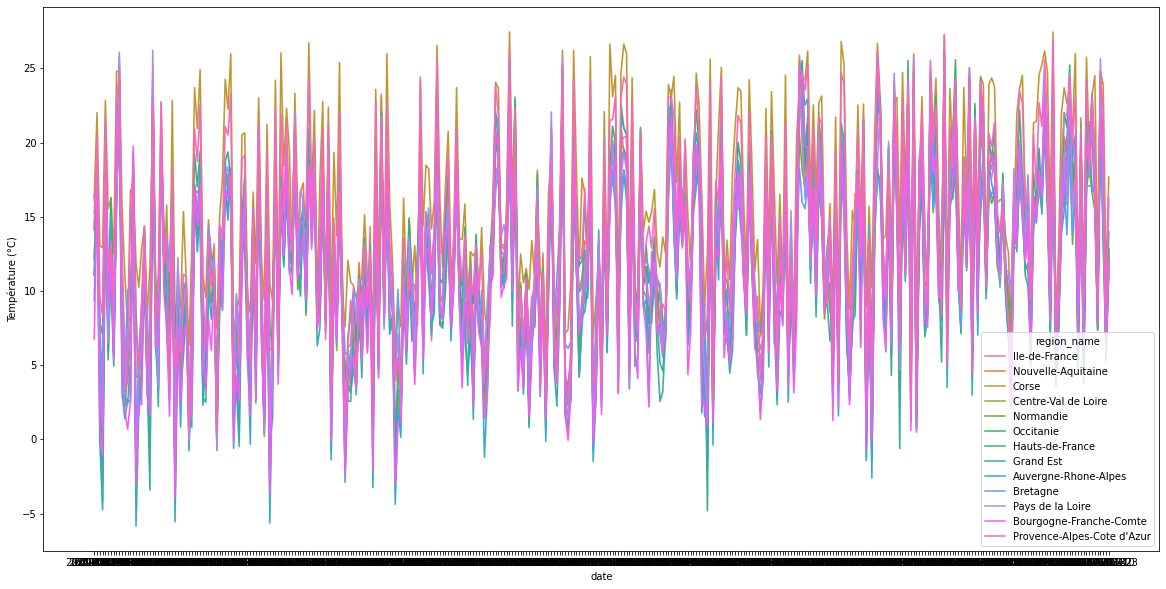

In [632]:
total_temp = final_df.groupby(['date', 'region_name'])[['Température (°C)']].mean().ewm(span=120).mean()

plt.figure(figsize=(20, 10))
sns.lineplot(data=total_temp.reset_index(),
            y=final_df['Température (°C)'],
            x=final_df['date'],
            hue=final_df['region_name'])

### 14. Repartition rain


In [ ]:
total_rain = final_df.groupby('region_name')[['Précipitations dans les 24 dernières heures']].mean()

plt.figure(figsize=(25, 10))
sns.boxplot(data=total_rain,
            y=final_df['Précipitations dans les 24 dernières heures'],
            x=final_df['region_name'])

In [ ]:
total_rain = final_df.groupby(['region_name','date'])[['Précipitations dans les 24 dernières heures']].mean().ewm(span=120).mean()

plt.figure(figsize=(25, 10))
sns.lineplot(data=total_rain,
            y=final_df['Précipitations dans les 24 dernières heures'],
            x=final_df['date'],
            hue=final_df['region_name'])

# Feature processing

In [47]:
from sklearn.model_selection import StratifiedShuffleSplit

In [159]:
df_ML = final_df.copy()

In [ ]:
df_ML.drop(labels = ['number_sessions', 'ratio_new_sessions', 'avg_session_duration',
                     'avg_session_pageviews', 'avg_session_hits', 'ratio_session_bounces',
                     'ratio_sessions_from_referral','ratio_sessions_from_email', 'ratio_sessions_from_social',
                     'ratio_sessions_from_direct', 'ratio_sessions_from_organic_search','ratio_sessions_from_paid_search', 
                     'ratio_sessions_from_display','ratio_sessions_from_other', 'number_distinct_contents', 'avg_page_hit_number',
                     'median_page_hit_number', 'avg_page_hit_time', 'median_page_hit_time','avg_number_hits_on_page',
                     'median_number_hits_on_page','ratio_page_from_recherche','median_ratings', 'avg_ratings_counts',
                     'median_ratings_counts',  'median_cooking_time','avg_preparation_time', 'median_preparation_time', 
                     'avg_nb_ingredients','median_nb_ingredients', 'avg_nb_steps', 'median_nb_steps', 'dt_date', 'month',
                     'day', 'weeknumber'],
                  axis=1,
                  inplace=True)



In [84]:
df_ML.isnull().sum()

index                                          0
date                                           0
region_name                                    0
recipe_type                                    0
Pagelvl4                                       0
number_users                                   0
ratio_sessions_from_mobile                     0
ratio_sessions_from_tablet                     0
ratio_sessions_from_desktop                    0
number_contents                                0
ratio_page_from_home                           0
ratio_recipes_with_video                       0
ratio_recipes_with_picture                     0
ratio_recipes_difficulty_tres_facile           0
ratio_recipes_difficulty_facile                0
ratio_recipes_difficulty_moyenne               0
ratio_recipes_difficulty_difficile             0
ratio_recipes_cost_bon_marche                  0
ratio_recipes_cost_moyen                       0
ratio_recipes_cost_assez_cher                  0
avg_ratings         

In [146]:
df_ML.columns

Index(['index', 'date', 'region_name', 'recipe_type', 'Pagelvl4',
       'number_users', 'ratio_sessions_from_mobile',
       'ratio_sessions_from_tablet', 'ratio_sessions_from_desktop',
       'number_contents', 'ratio_page_from_home', 'ratio_recipes_with_video',
       'ratio_recipes_with_picture', 'ratio_recipes_difficulty_tres_facile',
       'ratio_recipes_difficulty_facile', 'ratio_recipes_difficulty_moyenne',
       'ratio_recipes_difficulty_difficile', 'ratio_recipes_cost_bon_marche',
       'ratio_recipes_cost_moyen', 'ratio_recipes_cost_assez_cher',
       'avg_ratings', 'avg_cooking_time',
       'Précipitations dans les 24 dernières heures', 'Température (°C)',
       'type_recette', 'dayofweek', 'is_weekend', 'is_bank_holiday'],
      dtype='object')

In [49]:
df_ML.dropna(subset = ['avg_ratings'], inplace=True)

In [50]:
df_ML.isnull().sum()

date               0
region_name        0
recipe_type        0
Pagelvl4           0
number_users       0
                  ..
day                0
weeknumber         0
dayofweek          0
is_weekend         0
is_bank_holiday    0
Length: 63, dtype: int64

In [51]:
df_ML.head()

date    region_name     recipe_type Pagelvl4  number_users  \
10  2021-10-18  Ile-de-France  accompagnement      riz           361   
11  2021-10-18  Ile-de-France         dessert     flan             1   
12  2021-10-18  Ile-de-France         dessert     flan           942   
13  2021-10-18  Ile-de-France         dessert     pain            13   
14  2021-10-18  Ile-de-France   platprincipal     pain            16   

    number_sessions  ratio_new_sessions  avg_session_duration  \
10              666                0.30                862.91   
11                1                0.00                  4.00   
12             2147                0.31                672.05   
13               19                0.42                746.05   
14               22                0.45                595.68   

    avg_session_pageviews  avg_session_hits  ...  \
10                   8.24             23.39  ...   
11                   2.00              2.00  ...   
12                   6.19             18.02  ...   
13                   4.00             15.68  ...   
14                   5.00             17.00  ...   

    Précipitations dans les 24 dernières heures  Température (°C)  \
10                                       0.2875              12.0   
11                                       0.2875              12.0   
12                                       0.2875              12.0   
13                                       0.2875              12.0   
14                                       0.2875              12.0   

            type_recette    dt_date  month  day  weeknumber  dayofweek  \
10  accompagnement / riz 2021-10-18     10   18          42          1   
11        dessert / flan 2021-10-18     10   18          42          1   
12        dessert / flan 2021-10-18     10   18          42          1   
13        dessert / pain 2021-10-18     10   18          42          1   
14  platprincipal / pain 2021-10-18     10   18          42          1   

    is_weekend  is_bank_holiday  
10           0                0  
11           0                0  
12           0                0  
13           0                0  
14           0                0  

[5 rows x 63 columns]

# Machine learning

#### Correlation matrix

<AxesSubplot:>

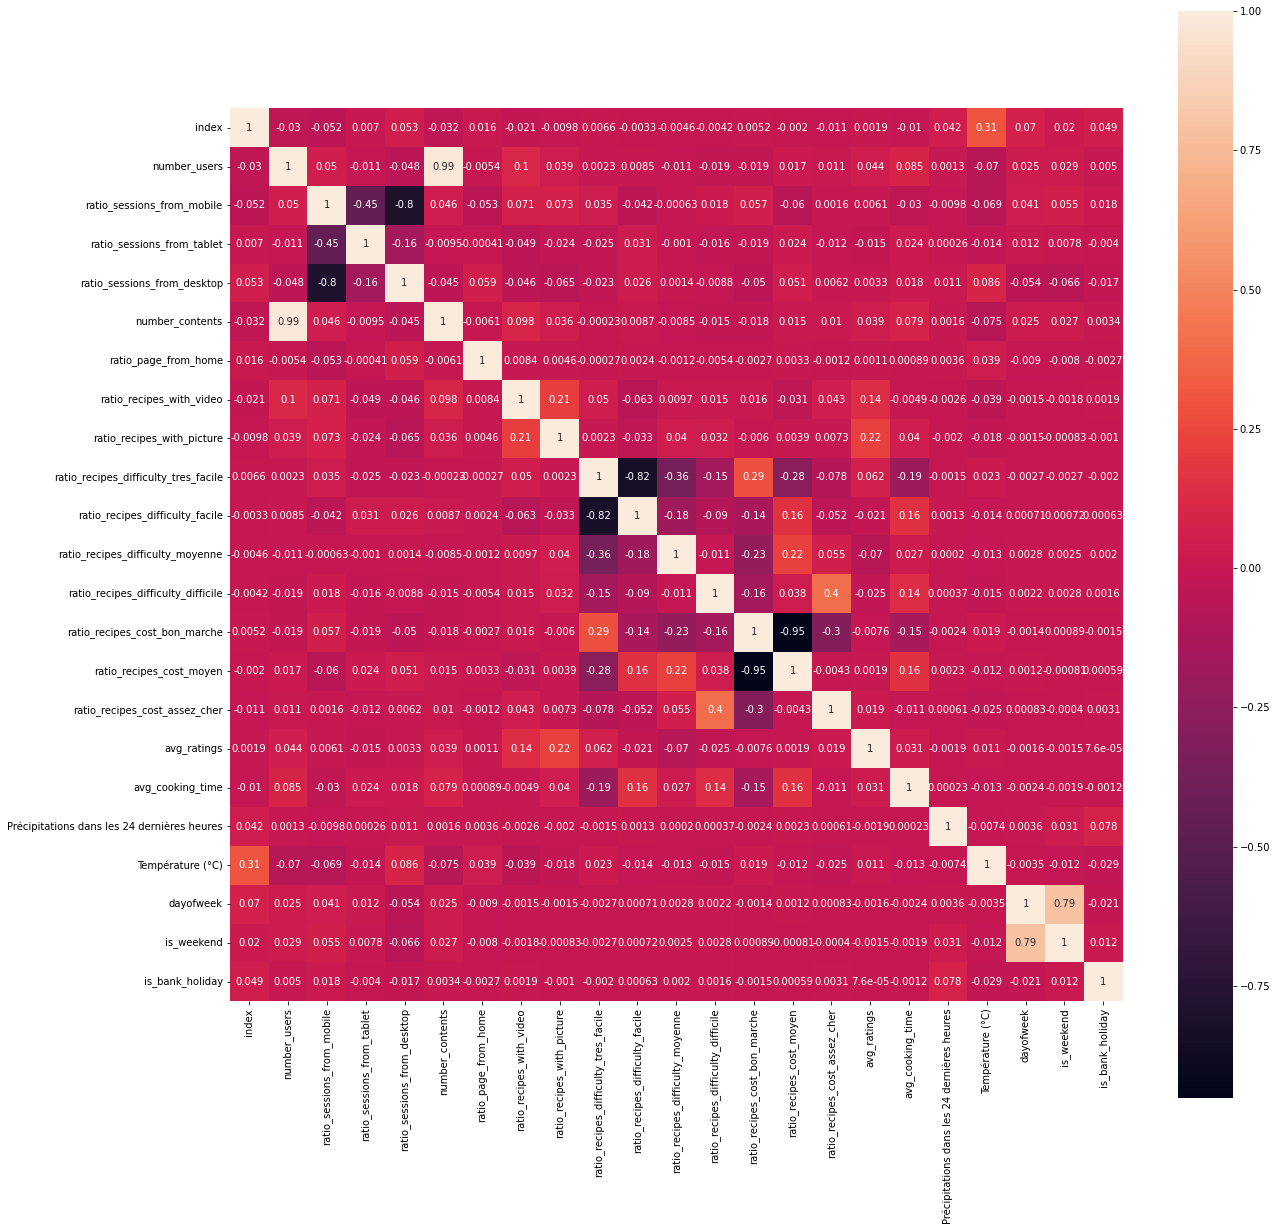

In [85]:
plt.figure(figsize=(20, 20))
sns.heatmap(df_ML.corr(), annot=True, square=True)

### Correlation analysis

In [263]:
from numpy.random import rand
from numpy.random import seed
from scipy.stats import spearmanr

##### Correlation number of users vs Temperature

In [96]:
coef,p = spearmanr(df_ML['number_users'], df_ML['Température (°C)'])

In [97]:
print(coef)
print(p)

-0.12860419909964732
0.0


In [98]:
alpha = 0.05
if p > alpha:
    print('Samples are uncorrelated')
else: 
    print('Samples are correlated')

Samples are correlated


##### Correlation number of contents vs Temperature

In [99]:
coef,p = spearmanr(df_ML['number_contents'], df_ML['Température (°C)'])
print(coef)
print(p)

-0.14471497707938755
0.0


In [100]:
alpha = 0.05
if p > alpha:
    print('Samples are uncorrelated')
else: 
    print('Samples are correlated')

Samples are correlated


##### Correlation number of users vs precipitations

In [101]:
coef,p = spearmanr(df_ML['number_users'], df_ML['Précipitations dans les 24 dernières heures'])
print(coef)
print(p)

0.008661756559610111
3.338424225438139e-24


In [102]:
alpha = 0.05
if p > alpha:
    print('Samples are uncorrelated')
else: 
    print('Samples are correlated')

Samples are correlated


##### Correlation number of contents vs precipitations

In [ ]:
coef,p = spearmanr(df_ML['number_contents'], df_ML['Précipitations dans les 24 dernières heures'])
print(coef)
print(p)

In [ ]:
alpha = 0.05
if p > alpha:
    print('Samples are uncorrelated')

else: 
    print('Samples are correlated')

##### Correlation number of users vs day of week

In [ ]:
coef,p = spearmanr(df_ML['number_users'], df_ML['dayofweek'])
print(coef)
print(p)

In [ ]:
alpha = 0.05
if p > alpha:
    print('Samples are uncorrelated')
else: 
    print('Samples are correlated')

##### Correlation number of contents vs day of week

In [ ]:
coef,p = spearmanr(df_ML['number_contents'], df_ML['dayofweek'])
print(coef)
print(p)

In [ ]:
alpha = 0.05
if p > alpha:
    print('Samples are uncorrelated')
else: 
    print('Samples are correlated')

##### Correlation number of users vs day of weekend

In [ ]:
coef,p = spearmanr(df_ML['number_users'], df_ML['is_weekend'])
print(coef)
print(p)

In [ ]:
alpha = 0.05
if p > alpha:
    print('Samples are uncorrelated')
else: 
    print('Samples are correlated')

##### Correlation number of contents vs day of weekend

In [ ]:
coef,p = spearmanr(df_ML['number_contents'], df_ML['is_weekend'])
print(coef)
print(p)

In [ ]:
alpha = 0.05
if p > alpha:
    print('Samples are uncorrelated')
else: 
    print('Samples are correlated')

##### Correlation number of users vs the holidays

In [ ]:
coef,p = spearmanr(df_ML['number_users'], df_ML['is_bank_holiday'])
print(coef)
print(p)

In [ ]:
alpha = 0.05
if p > alpha:
    print('Samples are uncorrelated')
else: 
    print('Samples are correlated')

##### Correlation number of contents vs the holidays

In [ ]:
coef,p = spearmanr(df_ML['number_contents'], df_ML['is_bank_holiday'])
print(coef)
print(p)

In [ ]:
alpha = 0.05
if p > alpha:
    print('Samples are uncorrelated')
else: 
    print('Samples are correlated')

##### Correlation number of contents vs type_recette

In [ ]:
coef,p = spearmanr(df_ML['number_contents'], df_ML['type_recette'])
print(coef)
print(p)

##### Correlation number of users vs type_recette

In [ ]:
coef,p = spearmanr(df_ML['number_users'], df_ML['type_recette'])
print(coef)
print(p)

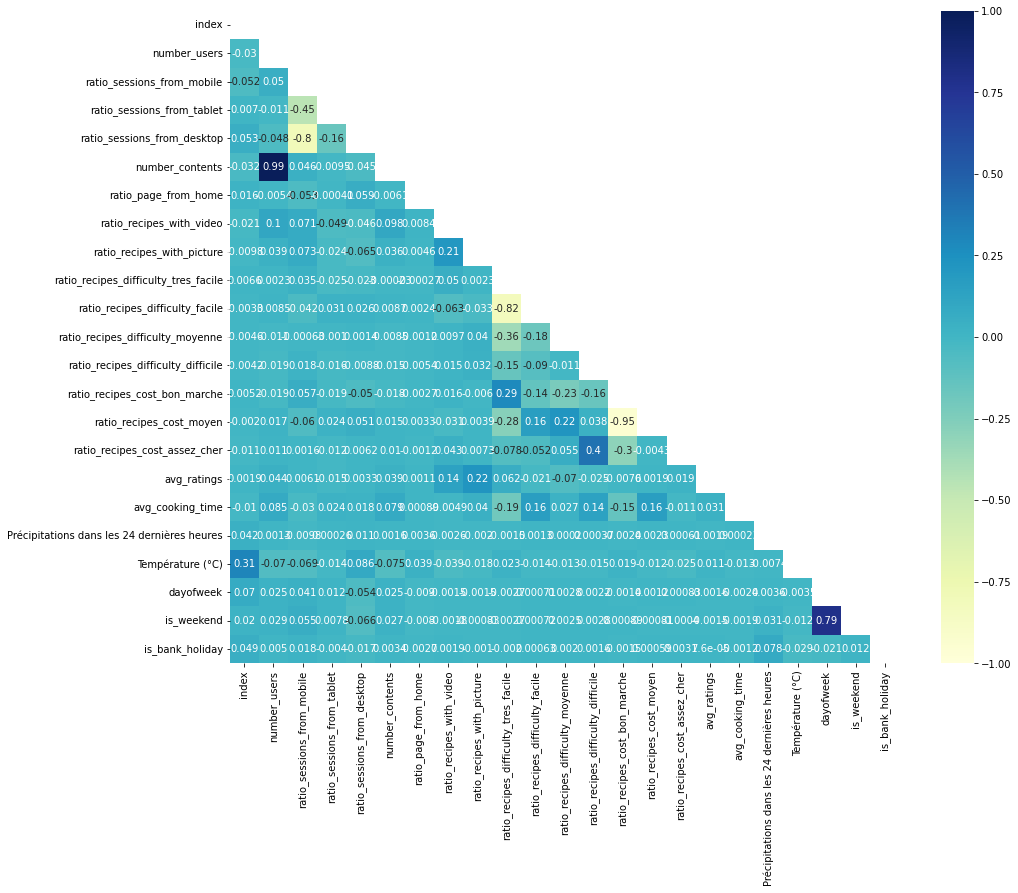

In [390]:

plt.figure(figsize=(15, 12))
matrix = np.triu(df_ML.corr())
sns.heatmap(df_ML.corr(), annot=True, fmt='.2g', mask=matrix, cmap="YlGnBu", vmin=-1, vmax=1)
plt.show()

In [391]:
df_ML.describe()

index  number_users  ratio_sessions_from_mobile  \
count  1.372911e+06  1.372911e+06                1.372911e+06   
mean   7.989546e+05  1.117691e+02                6.590331e-01   
std    4.601910e+05  5.313346e+02                2.738288e-01   
min    1.000000e+01  1.000000e+00                0.000000e+00   
25%    4.005455e+05  3.000000e+00                5.300000e-01   
50%    8.028730e+05  1.100000e+01                7.000000e-01   
75%    1.197072e+06  5.000000e+01                8.500000e-01   
max    1.594152e+06  5.349900e+04                1.000000e+00   

       ratio_sessions_from_tablet  ratio_sessions_from_desktop  \
count                1.372911e+06                 1.372911e+06   
mean                 9.916737e-02                 2.419916e-01   
std                  1.649290e-01                 2.472157e-01   
min                  0.000000e+00                 0.000000e+00   
25%                  0.000000e+00                 7.000000e-02   
50%                  5.000000e-02                 1.900000e-01   
75%                  1.300000e-01                 3.300000e-01   
max                  1.000000e+00                 1.000000e+00   

       number_contents  ratio_page_from_home  ratio_recipes_with_video  \
count     1.372911e+06          1.372911e+06              1.372911e+06   
mean      2.382096e+02          6.976687e-03              4.176775e-01   
std       1.313490e+03          4.395151e-02              3.727812e-01   
min       1.000000e+00          0.000000e+00              0.000000e+00   
25%       4.000000e+00          0.000000e+00              0.000000e+00   
50%       1.800000e+01          0.000000e+00              4.100000e-01   
75%       8.800000e+01          0.000000e+00              7.500000e-01   
max       1.411830e+05          1.000000e+00              1.000000e+00   

       ratio_recipes_with_picture  ratio_recipes_difficulty_tres_facile  ...  \
count                1.372911e+06                          1.372911e+06  ...   
mean                 9.404260e-01                          5.724911e-01  ...   
std                  1.625687e-01                          3.639314e-01  ...   
min                  0.000000e+00                          0.000000e+00  ...   
25%                  9.600000e-01                          2.600000e-01  ...   
50%                  1.000000e+00                          6.200000e-01  ...   
75%                  1.000000e+00                          9.500000e-01  ...   
max                  1.000000e+00                          1.000000e+00  ...   

       ratio_recipes_cost_bon_marche  ratio_recipes_cost_moyen  \
count                   1.372911e+06              1.372911e+06   
mean                    8.033184e-01              1.819454e-01   
std                     2.956921e-01              2.820030e-01   
min                     0.000000e+00              0.000000e+00   
25%                     7.300000e-01              0.000000e+00   
50%                     9.600000e-01              4.000000e-02   
75%                     1.000000e+00              2.500000e-01   
max                     1.000000e+00              1.000000e+00   

       ratio_recipes_cost_assez_cher   avg_ratings  avg_cooking_time  \
count                   1.372911e+06  1.372911e+06      1.372911e+06   
mean                    1.478359e-02  4.426739e+00      1.270718e+03   
std                     9.029237e-02  5.150308e-01      1.575606e+03   
min                     0.000000e+00  0.000000e+00      0.000000e+00   
25%                     0.000000e+00  4.340000e+00      3.600000e+02   
50%                     0.000000e+00  4.530000e+00      1.037500e+03   
75%                     0.000000e+00  4.670000e+00      1.777045e+03   
max                     1.000000e+00  5.000000e+00      1.728000e+05   

       Précipitations dans les 24 dernières heures  Température (°C)  \
count                                 1.372911e+06      1.372911e+06   
mean                                  1.960254e+00      1

In [771]:
#df_ML_train.drop(labels = ["date", "recipe_type", "Pagelvl4"], inplace=True, axis = 1)

In [916]:
df_ML.drop(labels = ["index", "level_0"], inplace=True, axis = 1)
df_ML.head(2)

date    region_name     recipe_type Pagelvl4  number_users  \
0  2021-10-18  Ile-de-France  accompagnement      riz           361   
1  2021-10-18  Ile-de-France         dessert     flan             1   

   ratio_sessions_from_mobile  ratio_sessions_from_tablet  \
0                        0.78                        0.08   
1                        1.00                        0.00   

   ratio_sessions_from_desktop  number_contents  ratio_page_from_home  ...  \
0                         0.13              666                   0.0  ...   
1                         0.00                1                   0.0  ...   

   avg_ratings  avg_cooking_time  Précipitations dans les 24 dernières heures  \
0         4.48           1293.78                                       0.2875   
1         4.59           2700.00                                       0.2875   

   Température (°C)          type_recette  dayofweek  is_weekend  \
0              12.0  accompagnement / riz          1           0   
1              12.0        dessert / flan          1           0   

   is_bank_holiday  encoded_region  encoded_recipe_type  
0                0               7                    0  
1                0               7                    5  

[2 rows x 29 columns]

In [917]:
df_ML.columns

Index(['date', 'region_name', 'recipe_type', 'Pagelvl4', 'number_users',
       'ratio_sessions_from_mobile', 'ratio_sessions_from_tablet',
       'ratio_sessions_from_desktop', 'number_contents',
       'ratio_page_from_home', 'ratio_recipes_with_video',
       'ratio_recipes_with_picture', 'ratio_recipes_difficulty_tres_facile',
       'ratio_recipes_difficulty_facile', 'ratio_recipes_difficulty_moyenne',
       'ratio_recipes_difficulty_difficile', 'ratio_recipes_cost_bon_marche',
       'ratio_recipes_cost_moyen', 'ratio_recipes_cost_assez_cher',
       'avg_ratings', 'avg_cooking_time',
       'Précipitations dans les 24 dernières heures', 'Température (°C)',
       'type_recette', 'dayofweek', 'is_weekend', 'is_bank_holiday',
       'encoded_region', 'encoded_recipe_type'],
      dtype='object')

# Let's work on the categorial data

### We need to modify them to make them become numerical data

In [160]:
from sklearn.preprocessing import LabelEncoder

le_region = LabelEncoder()
df_ML["encoded_region"] = le_region.fit_transform(df_ML.region_name)
le_recipe_type = LabelEncoder()
df_ML["encoded_recipe_type"] = le_region.fit_transform(df_ML.recipe_type)

In [162]:
df_ML.columns

Index(['date', 'region_name', 'recipe_type', 'Pagelvl4', 'number_users',
       'number_sessions', 'ratio_new_sessions', 'avg_session_duration',
       'avg_session_pageviews', 'avg_session_hits', 'ratio_session_bounces',
       'ratio_sessions_from_mobile', 'ratio_sessions_from_tablet',
       'ratio_sessions_from_desktop', 'ratio_sessions_from_referral',
       'ratio_sessions_from_email', 'ratio_sessions_from_social',
       'ratio_sessions_from_direct', 'ratio_sessions_from_organic_search',
       'ratio_sessions_from_paid_search', 'ratio_sessions_from_display',
       'ratio_sessions_from_other', 'number_contents',
       'number_distinct_contents', 'avg_page_hit_number',
       'median_page_hit_number', 'avg_page_hit_time', 'median_page_hit_time',
       'avg_number_hits_on_page', 'median_number_hits_on_page',
       'ratio_page_from_home', 'ratio_page_from_recherche',
       'ratio_recipes_with_video', 'ratio_recipes_with_picture',
       'ratio_recipes_difficulty_tres_facile',


In [163]:
dico = dict()
for key in ['ratio_sessions_from_mobile',
            'ratio_sessions_from_tablet',
            'ratio_sessions_from_desktop', 
            'ratio_page_from_home',
            'ratio_recipes_with_video',
            'ratio_recipes_with_picture',
            'ratio_recipes_difficulty_tres_facile',
            'ratio_recipes_difficulty_facile',
            'ratio_recipes_difficulty_moyenne',
            'ratio_recipes_difficulty_difficile',
            'ratio_recipes_cost_bon_marche',
            'ratio_recipes_cost_moyen',
            'ratio_recipes_cost_assez_cher',
            'avg_ratings',
            'avg_cooking_time',
            'Précipitations dans les 24 dernières heures',
            'Température (°C)',
            'dayofweek',
            'is_weekend',
            'is_bank_holiday',
            'encoded_region',
            'encoded_recipe_type']:
    dico[key] = np.mean

In [164]:
dico.update({"number_users": np.sum,
             "number_contents": np.sum})

In [167]:
df_ML_new = df_ML.groupby(["date",
                           "region_name",
                           "recipe_type",
                           "Pagelvl4"]).agg(dico).reset_index()

In [168]:
df_ML_new.shape

(1219668, 28)

In [169]:
#!pip install nltk
# We'll work on the textual data we have in pagelvl4 
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords

tfidf_model = TfidfVectorizer(stop_words=stopwords.words("french"), strip_accents="unicode")
tfidf_scores = tfidf_model.fit_transform(df_ML_new["Pagelvl4"]) #tfidf_scores à rajouter à ton X
tfidf_scores_array = tfidf_scores.toarray()
word2id = tfidf_model.vocabulary_
id2word = {v:k for k,v in word2id.items()}
df_ML_new = pd.concat([df_ML_new,
                       pd.DataFrame(tfidf_scores_array,
                                    columns=[f"{id2word[i]}" for i in range(len(id2word))])],
                      axis=1)

/opt/anaconda3/envs/env_jul/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['etaient', 'etais', 'etait', 'etant', 'etante', 'etantes', 'etants', 'ete', 'etee', 'etees', 'etes', 'etiez', 'etions', 'eumes', 'eutes', 'fumes', 'futes', 'meme'] not in stop_words.
  warnings.warn(


In [170]:
%%time
df_ML_new['date'] = pd.to_datetime(df_ML_new['date'])

df_test = df_ML_new.groupby(["region_name", 
                           "Pagelvl4",
                           "recipe_type"]).apply(lambda x: x.set_index('date').resample('1D').first())

CPU times: user 22.1 s, sys: 13.9 s, total: 36 s
Wall time: 43.4 s


In [171]:
df_test.head(1)

region_name  \
region_name          Pagelvl4 recipe_type date                               
Auvergne-Rhone-Alpes aioli    entree      2021-01-02  Auvergne-Rhone-Alpes   

                                                     recipe_type Pagelvl4  \
region_name          Pagelvl4 recipe_type date                              
Auvergne-Rhone-Alpes aioli    entree      2021-01-02      entree    aioli   

                                                      ratio_sessions_from_mobile  \
region_name          Pagelvl4 recipe_type date                                     
Auvergne-Rhone-Alpes aioli    entree      2021-01-02                         0.0   

                                                      ratio_sessions_from_tablet  \
region_name          Pagelvl4 recipe_type date                                     
Auvergne-Rhone-Alpes aioli    entree      2021-01-02                         0.0   

                                                      ratio_sessions_from_desktop  \
region_name          Pagelvl4 recipe_type date                                      
Auvergne-Rhone-Alpes aioli    entree      2021-01-02                          1.0   

                                                      ratio_page_from_home  \
region_name          Pagelvl4 recipe_type date                               
Auvergne-Rhone-Alpes aioli    entree      2021-01-02                   0.0   

                                                      ratio_recipes_with_video  \
region_name          Pagelvl4 recipe_type date                                   
Auvergne-Rhone-Alpes aioli    entree      2021-01-02                       0.0   

                                                      ratio_recipes_with_picture  \
region_name          Pagelvl4 recipe_type date                                     
Auvergne-Rhone-Alpes aioli    entree      2021-01-02                         0.0   

                                                      ratio_recipes_difficulty_tres_facile  \
region_name          Pagelvl4 recipe_type date                                               
Auvergne-Rhone-Alpes aioli    entree      2021-01-02                                   0.0   

                                                      ...  viande  \
region_name          Pagelvl4 recipe_type date        ...           
Auvergne-Rhone-Alpes aioli    entree      2021-01-02  ...     0.0   

                                                      viennoiseries  vierge  \
region_name          Pagelvl4 recipe_type date                                
Auvergne-Rhone-Alpes aioli    entree      2021-01-02            0.0     0.0   

                                                      vin  vinaigrette  wok  \
region_name          Pagelvl4 recipe_type date                                
Auvergne-Rhone-Alpes aioli    entree      2021-01-02  0.0          0.0  0.0   

                                                      wrap  yaourt  \
region_name          Pagelvl4 recipe_type date                       
Auvergne-Rhone-Alpes aioli    entree      2021-01-02   0.0     0.0   

                                                      yaourtiere  yaourts  
region_name          Pagelvl4 recipe_type date                             
Auvergne-Rhone-Alpes aioli    entree      2021-01-02         0.0      0.0  

[1 rows x 256 columns]

### Try adding and removing features


In [172]:
# We want to add new metrics such as the averages or evolution rates of some metrics in the last 2 days
# Then we'll merge these metrics to our dataframe


test2 = df_test[['number_users', 
                 "number_contents", 
                 'ratio_sessions_from_mobile',
                 'ratio_sessions_from_tablet',
                 'ratio_sessions_from_desktop',
                 'ratio_page_from_home',
                 'ratio_recipes_with_video',
                 'ratio_recipes_with_picture',
                 'ratio_recipes_difficulty_tres_facile',
                 'ratio_recipes_difficulty_facile',
                 'ratio_recipes_difficulty_moyenne',
                 'ratio_recipes_difficulty_difficile',
                 'ratio_recipes_cost_bon_marche',
                 'ratio_recipes_cost_moyen',
                 'ratio_recipes_cost_assez_cher',
                 'ratio_recipes_cost_assez_cher']].apply(lambda x: x.shift().rolling(min_periods=1, window=2).mean()).rename(columns={"number_users": "avg_number_users_2days", 
                                                                                                                                     "number_contents":'Contents_avg_past_2days', 
                                                                                                                                     'ratio_sessions_from_mobile':'ratio_mobile_avg_past_2days', 
                                                                                                                                     'ratio_sessions_from_tablet':'ratio_tablet_avg_past_2days',
                                                                                                                                     'ratio_sessions_from_desktop':'ratio_desktop_avg_past_2days',
                                                                                                                                     'ratio_page_from_home':'ratio_home_avg_past_2days',
                                                                                                                                     'ratio_recipes_with_video':'ratio_video_avg_past_2days',
                                                                                                                                     'ratio_recipes_with_picture':'ratio_picture_avg_past_2days',
                                                                                                                                     'ratio_recipes_difficulty_tres_facile':'ratio_tres_facile_avg_past_2days',
                                                                                                                                     'ratio_recipes_difficulty_facile':'ratio_facile_avg_past_2days',
                                                                                                                                     'ratio_recipes_difficulty_moyenne':'ratio_moyenne_avg_past_2days',
                                                                                                                                     'ratio_recipes_difficulty_difficile':'ratio_difficile_avg_past_2days',
                                                                                                                                     'ratio_recipes_cost_bon_marche':'ratio_bon_marche_avg_past_2days',
                                                                                                                                     'ratio_recipes_cost_moyen':'ratio_cost_moyen_avg_past_2days',
                                                                                                                                     'ratio_recipes_cost_assez_cher':'ratio_assez_cher_avg_past_2days',
                                                                                                                                     'ratio_recipes_cost_assez_cher':'ratio_assez_cher_avg_past_2days'}).reset_index()
df_ML_new =  pd.merge(df_ML_new, test2, on=['date',
                                        "region_name", 
                                       "Pagelvl4",
                                       "recipe_type"], how='left')

In [174]:
test2.head()

region_name Pagelvl4 recipe_type       date  \
0  Auvergne-Rhone-Alpes    aioli      entree 2021-01-02   
1  Auvergne-Rhone-Alpes    aioli      entree 2021-01-03   
2  Auvergne-Rhone-Alpes    aioli      entree 2021-01-04   
3  Auvergne-Rhone-Alpes    aioli      entree 2021-01-05   
4  Auvergne-Rhone-Alpes    aioli      entree 2021-01-06   

   avg_number_users_2days  Contents_avg_past_2days  \
0                     NaN                      NaN   
1                     2.0                      2.0   
2                     2.0                      2.0   
3                     NaN                      NaN   
4                     1.0                      1.0   

   ratio_mobile_avg_past_2days  ratio_tablet_avg_past_2days  \
0                          NaN                          NaN   
1                          0.0                          0.0   
2                          0.0                          0.0   
3                          NaN                          NaN   
4                          0.0                          1.0   

   ratio_desktop_avg_past_2days  ratio_home_avg_past_2days  \
0                           NaN                        NaN   
1                           1.0                        0.0   
2                           1.0                        0.0   
3                           NaN                        NaN   
4                           0.0                        0.0   

   ratio_video_avg_past_2days  ratio_picture_avg_past_2days  \
0                         NaN                           NaN   
1                         0.0                           0.0   
2                         0.0                           0.0   
3                         NaN                           NaN   
4                         0.0                           0.0   

   ratio_tres_facile_avg_past_2days  ratio_facile_avg_past_2days  \
0                               NaN                          NaN   
1                               0.0                          1.0   
2                               0.0                          1.0   
3                               NaN                          NaN   
4                               0.0                          1.0   

   ratio_moyenne_avg_past_2days  ratio_difficile_avg_past_2days  \
0                           NaN                             NaN   
1                           0.0                             0.0   
2                           0.0                             0.0   
3                           NaN                             NaN   
4                           0.0                             0.0   

   ratio_bon_marche_avg_past_2days  ratio_cost_moyen_avg_past_2days  \
0                              NaN                              NaN   
1                              0.0                              1.0   
2                              0.0                              1.0   
3                              NaN                              NaN   
4                              0.0                              1.0   

   ratio_assez_cher_avg_past_2days  ratio_assez_cher_avg_past_2days  
0                              NaN                              NaN  
1                              0.0                              0.0  
2                              0.0                              0.0  
3                              NaN                              NaN  
4                              0.0                              0.0

In [175]:
df_ML_new.shape

(1219668, 273)

In [176]:
df_ML_new.isnull().sum()

date                                   0
region_name                            0
recipe_type                            0
Pagelvl4                               0
ratio_sessions_from_mobile             0
                                   ...  
ratio_difficile_avg_past_2days     45459
ratio_bon_marche_avg_past_2days    45459
ratio_cost_moyen_avg_past_2days    45459
ratio_assez_cher_avg_past_2days    45459
ratio_assez_cher_avg_past_2days    45459
Length: 273, dtype: int64

In [177]:
test2 = df_test[['number_users', 
                 "number_contents"]].pct_change(periods=2).rename(columns={"number_users": "evol_number_users_2days", 
                                                                           "number_contents":'evol_content_past_2days'}).reset_index()
df_ML_new =  pd.merge(df_ML_new, test2, on=['date',
                                        "region_name", 
                                       "Pagelvl4",
                                       "recipe_type"], how='left')

In [178]:
df_ML_new.shape

(1219668, 275)

In [179]:
df_ML_new.isna().sum()#/len(df_ML_new)

date                                   0
region_name                            0
recipe_type                            0
Pagelvl4                               0
ratio_sessions_from_mobile             0
                                   ...  
ratio_cost_moyen_avg_past_2days    45459
ratio_assez_cher_avg_past_2days    45459
ratio_assez_cher_avg_past_2days    45459
evol_number_users_2days                1
evol_content_past_2days                1
Length: 275, dtype: int64

In [180]:
cols = ["avg_number_users_2days", 
                         'Contents_avg_past_2days', 
                         'ratio_mobile_avg_past_2days', 
                         'ratio_tablet_avg_past_2days',
                         'ratio_desktop_avg_past_2days',
                         'ratio_home_avg_past_2days',
                         'ratio_video_avg_past_2days',
                         'ratio_picture_avg_past_2days',
                         'ratio_tres_facile_avg_past_2days',
                         'ratio_facile_avg_past_2days',
                         'ratio_moyenne_avg_past_2days',
                         'ratio_difficile_avg_past_2days',
                         'ratio_bon_marche_avg_past_2days',
                         'ratio_cost_moyen_avg_past_2days',
                         'ratio_assez_cher_avg_past_2days',
                         'ratio_assez_cher_avg_past_2days',
                         "evol_number_users_2days", 
                         "evol_content_past_2days"]

df_ML_new[cols]

avg_number_users_2days  Contents_avg_past_2days  \
0                          25.5                     50.0   
1                           1.0                      1.0   
2                         114.0                    318.5   
3                           3.5                      7.0   
4                         135.0                    285.0   
...                         ...                      ...   
1219663                    57.0                     97.5   
1219664                     3.0                      4.0   
1219665                    53.5                     75.0   
1219666                    67.5                    125.5   
1219667                    40.0                     61.0   

         ratio_mobile_avg_past_2days  ratio_tablet_avg_past_2days  \
0                              0.830                 6.500000e-02   
1                              1.000                 2.220446e-16   
2                              0.795                 8.500000e-02   
3                              0.915                 8.500000e-02   
4                              0.820                 6.500000e-02   
...                              ...                          ...   
1219663                        0.750                 8.000000e-02   
1219664                        0.785                 7.444045e-14   
1219665                        0.780                 7.000000e-02   
1219666                        0.785                 6.500000e-02   
1219667                        0.895                 2.500000e-02   

         ratio_desktop_avg_past_2days  ratio_home_avg_past_2days  \
0                        1.100000e-01               1.000000e-02   
1                        1.554312e-15               0.000000e+00   
2                        1.200000e-01               5.000000e-03   
3                        1.054712e-15               0.000000e+00   
4                        1.200000e-01               5.000000e-03   
...                               ...                        ...   
1219663                  1.750000e-01               5.000000e-03   
1219664                  2.150000e-01               1.998401e-15   
1219665                  1.450000e-01               5.000000e-03   
1219666                  1.500000e-01               5.000000e-03   
1219667                  8.000000e-02               1.998401e-15   

         ratio_video_avg_past_2days  ratio_picture_avg_past_2days  \
0                             0.000                         0.990   
1                             0.000                         1.000   
2                             0.535                         0.995   
3                             0.000                         0.915   
4                             0.000                         1.000   
...                             ...                           ...   
1219663                       0.255                         1.000   
1219664                       0.000                         1.000   
1219665                       0.000                         0.940   
1219666                       0.710                         0.990   
1219667                       0.670                         0.985   

         ratio_tres_facile_avg_past_2days  ratio_facile_avg_past_2days  \
0                            1.000000e+00                 2.220446e-16   
1                            4.440892e-16                 4.440892e-16   
2                            5.850000e-01                 3.300000e-01   
3                            8.750000e-01                 1.250000e-01   
4                            1.000000e+00                 0.000000e+00   
...                                   ...                          ...   
1219663                      4.200000e-01                 4.100000e-01   
1219664                      1.000000e+00                 1.301459e-13   
1219665                      1.300000e-01                 8.700000e-01   
1219666                      9.550000e-01                 4.500000e-02   

In [181]:
df_ML_new.dropna(subset=["avg_number_users_2days", 
                         'Contents_avg_past_2days', 
                         'ratio_mobile_avg_past_2days', 
                         'ratio_tablet_avg_past_2days',
                         'ratio_desktop_avg_past_2days',
                         'ratio_home_avg_past_2days',
                         'ratio_video_avg_past_2days',
                         'ratio_picture_avg_past_2days',
                         'ratio_tres_facile_avg_past_2days',
                         'ratio_facile_avg_past_2days',
                         'ratio_moyenne_avg_past_2days',
                         'ratio_difficile_avg_past_2days',
                         'ratio_bon_marche_avg_past_2days',
                         'ratio_cost_moyen_avg_past_2days',
                         'ratio_assez_cher_avg_past_2days',
                         'ratio_assez_cher_avg_past_2days',
                         "evol_number_users_2days", 
                         "evol_content_past_2days"],inplace=True)

In [182]:
df_ML_new.drop(labels=['date', 
                       'region_name', 
                       'recipe_type', 
                       'Pagelvl4',
                       'ratio_sessions_from_mobile', 
                       'ratio_sessions_from_tablet',
                       'ratio_sessions_from_desktop', 
                       'ratio_page_from_home',
                       'ratio_recipes_with_video', 
                       'ratio_recipes_with_picture', 
                       "number_users",
                       'ratio_recipes_difficulty_tres_facile',
                       'ratio_recipes_difficulty_facile', 
                       'ratio_recipes_difficulty_moyenne',
                       'ratio_recipes_difficulty_difficile', 
                       'ratio_recipes_cost_bon_marche',
                       'ratio_recipes_cost_moyen',  
                       'ratio_recipes_cost_assez_cher'], axis=1, inplace=True)

In [203]:
df_ML_new.dropna(subset=["avg_ratings"], inplace=True)

In [204]:
df_ML_new.isnull().sum()

avg_ratings                                    0
avg_cooking_time                               0
Précipitations dans les 24 dernières heures    0
Température (°C)                               0
dayofweek                                      0
                                              ..
ratio_cost_moyen_avg_past_2days                0
ratio_assez_cher_avg_past_2days                0
ratio_assez_cher_avg_past_2days                0
evol_number_users_2days                        0
evol_content_past_2days                        0
Length: 257, dtype: int64

In [205]:
y = df_ML_new['number_contents']

In [206]:
X = df_ML_new.drop(labels='number_contents', axis=1)

# Now we'll split our dataset into train & test datasets

In [207]:
from sklearn.model_selection import train_test_split

In [208]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [209]:
X_train.shape,\
X_test.shape,\
y_train.shape,\
y_test.shape

((923165, 256), (230792, 256), (923165,), (230792,))

In [216]:
X_train_sample = X_train#[:100000]
y_train_sample = y_train#[:100000]

### Random Forest

In [217]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_jobs=-1)
rf.fit(X_train_sample, y_train_sample)

RandomForestRegressor(n_jobs=-1)

In [218]:
y_pred = rf.predict(X_test)

In [214]:
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error, r2_score
mean_absolute_percentage_error(y_test, y_pred),\
mean_absolute_error(y_test, y_pred),\
mean_squared_error(y_test, y_pred),\
r2_score(y_test, y_pred)

(0.20146088538907012,
 26.843352455891026,
 52519.94152205707,
 0.9740691993948836)

In [219]:
mean_absolute_percentage_error(y_test, y_pred),\
mean_absolute_error(y_test, y_pred),\
mean_squared_error(y_test, y_pred),\
r2_score(y_test, y_pred)

(0.16130265656890053,
 20.612093746750315,
 25822.64992264896,
 0.9872505191964329)

<AxesSubplot:>

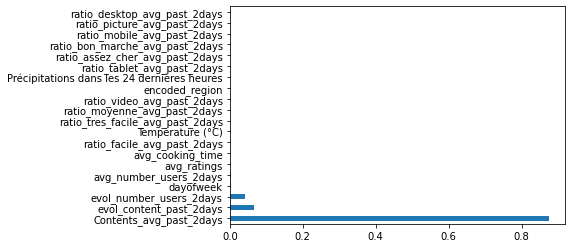

In [274]:
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')

In [220]:
num_cols = X_test.columns
for idx in np.argsort(rf.feature_importances_[:len(num_cols)])[::-1]:
    print(num_cols[idx], rf.feature_importances_[idx])

Contents_avg_past_2days 0.8744974712576166
evol_content_past_2days 0.0662164700674298
evol_number_users_2days 0.04093310462971002
dayofweek 0.004035887428744963
avg_number_users_2days 0.0030806628238361938
avg_ratings 0.0017367346941767315
avg_cooking_time 0.001238818671004117
ratio_facile_avg_past_2days 0.0008763428174191497
Température (°C) 0.0007357010624732313
ratio_tres_facile_avg_past_2days 0.000707090200382924
ratio_moyenne_avg_past_2days 0.0006444783406361128
ratio_video_avg_past_2days 0.0005278854373610677
encoded_region 0.0005212807802151103
Précipitations dans les 24 dernières heures 0.00045269928437365297
ratio_tablet_avg_past_2days 0.00037687685320541333
ratio_assez_cher_avg_past_2days 0.0003744778458127875
ratio_bon_marche_avg_past_2days 0.0003577711099401382
ratio_mobile_avg_past_2days 0.0003339497643580561
ratio_picture_avg_past_2days 0.0002968668176730229
ratio_desktop_avg_past_2days 0.00029229509539828864
ratio_assez_cher_avg_past_2days 0.00028501295279716865
ratio_co

In [957]:
X_train_sample = X_train[:100000]
y_train_sample = y_train[:100000]

# XGboost model

In [222]:
import xgboost as xgb

/opt/anaconda3/envs/env_jul/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [225]:
len(X_train.columns), len(set(X_train.columns))

(256, 255)

In [238]:
testt = X_train[["ratio_assez_cher_avg_past_2days"]].T
X_train["new_ratio_assez_cher_avg_past_2days"] = testt.iloc[0]
X_train.drop("ratio_assez_cher_avg_past_2days", axis=1, inplace=True)

testt = X_test[["ratio_assez_cher_avg_past_2days"]].T
X_test["new_ratio_assez_cher_avg_past_2days"] = testt.iloc[0]
X_test.drop("ratio_assez_cher_avg_past_2days", axis=1, inplace=True)

In [251]:
%%time

xg_reg = xgb.XGBRegressor(objective ='reg:squarederror',
                          #colsample_bytree = 0.3,
                          learning_rate = 0.1,
                          max_depth = 5,
                          alpha = 0.1,
                          n_estimators = 100,
                          n_jobs=-1)
xg_reg.fit(X_train, y_train)

/opt/anaconda3/envs/env_jul/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


CPU times: user 29min 28s, sys: 12.7 s, total: 29min 40s
Wall time: 4min 14s


XGBRegressor(alpha=0.1, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=-1,
             num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0.100000001, reg_lambda=1, scale_pos_weight=1,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [252]:
y_pred_xgb = xg_reg.predict(X_test)

In [253]:
mean_absolute_percentage_error(y_test, y_pred_xgb),\
mean_absolute_error(y_test, y_pred_xgb),\
mean_squared_error(y_test, y_pred_xgb),\
r2_score(y_test, y_pred_xgb)

(0.6858787050779038,
 23.625467290832724,
 17521.257789952764,
 0.9913491860627587)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

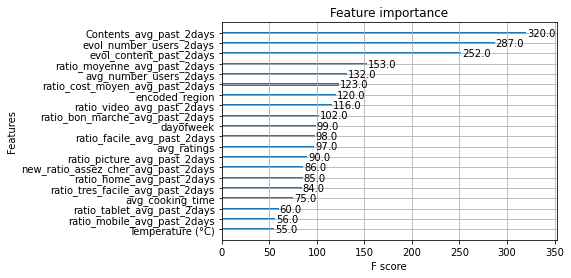

In [250]:
xgb.plot_importance(xg_reg, max_num_features=20)